<h1><span style="color: #6495ED;">Air Quality Prediction</span></h1>

<h2><span style="color: #6495ED;">Exploratory Data Analysis (EDA) and Baseline Modeling</span></h2>

Prepared by Lipsita Tripathy

Email: lipsitalt@gmail.com

December 2023

| <h2><span style="color: #FF6F61;">Table of Contents</span></h2> |
|----------------------------------------------|
| Introduction                                 |
| Dataset Overview and Preprocessing           |
| Exploratory Data Analysis (EDA)               |
| Baseline Models and Evaluation Metrics        |
| Next Steps                                   |

## Data Dictionary
The project utilizes air quality data extracted from 20 stations in Delhi for the years 2018 and 2019. The dataset comprises 12 features with instances recorded at each station.
| **Features**              | **Description**                                             | **Type**   |
|---------------------------|-------------------------------------------------------------|------------|
| Datetime                  | Timestamp indicating the date and time of the recorded data | -          |
| StationId                 | Unique identifier for each monitoring station               | Numeric    |
| PM2.5 (ug/m3)             | Particulate Matter with a diameter of 2.5 microns or less   | Numeric    |
| PM10 (ug/m3)              | Particulate Matter with a diameter of 10 microns or less   | Numeric    |
| NO (ug/m3)                | Nitric Oxide concentration                                  | Numeric    |
| NO2 (ug/m3)               | Nitrogen Dioxide concentration                               | Numeric    |
| NOx (ug/m3)               | Sum of Nitric Oxide and Nitrogen Dioxide concentrations     | Numeric    |
| NH3 (ug/m3)               | Ammonia concentration                                       | Numeric    |
| SO2 (ug/m3)               | Sulfur Dioxide concentration                                | Numeric    |
| CO (ug/m3)                | Carbon Monoxide concentration                               | Numeric    |
| Ozone (ug/m3)             | Ozone concentration                                         | Numeric    |
| Benzene (ug/m3)           | Concentration of Benzene in the air                          | Numeric    |
| Toluene (ug/m3)           | Concentration of Toluene in the air                          | Numeric    |
| RH (%)                    | Relative Humidity in percentage                             | Numeric    |
| WS (m/s)                  | Wind Speed in meters per second                              | Numeric    |
| WD (degree)               | Wind Direction in degrees                                   | Numeric    |
| BP (mmHg)                 | Barometric Pressure in millimeters of mercury               | Numeric    |
| AT (degree C)             | Ambient Temperature in degrees Celsius                      | Numeric    |
| RF (mm)                   | Rainfall in millimeters                                     | Numeric    |
| SR (W/mt2)                | Solar Radiation in Watts per square meter                    | Numeric    |
| Xylene (ug/m3)           | Concentration of Xylene in the air                            | Numeric    |


| **Trget**              | **Description**                                             | **Type**   |
|---------------------------|-------------------------------------------------------------|------------|
| y_AQI                     | Target variable representing the predicted Air Quality Index for next 24 hours| Numeric    |

## Introduction

As we delve into Sprint 2 of our Air Quality Prediction project, let's reflect on the journey we began in Sprint 1. In the initial phase, we illuminated the critical issue of air pollution in Delhi, setting the stage for a comprehensive data-driven solution. Our objective is clear: harness the power of data science and machine learning to predict air quality, providing invaluable insights for decision-makers and contributing to a healthier future.

### Contextualizing the Problem

In Sprint 1, we painted a vivid picture of the air quality challenges faced by the residents of Delhi. The city's iconic landmarks, shrouded in haze, tell a tale of persistent air pollution. The detrimental impact on health, equivalent to smoking 44 cigarettes a day, demands urgent attention. Clean air, a fundamental necessity, is compromised, influencing life expectancy and overall well-being.

### Unraveling Data Complexity

Our dataset, a treasure trove of hourly pollution and weather measurements from 25 monitoring stations in Delhi, presented both challenges and opportunities. Focused on the temporal aspect, we filtered and processed the data, addressing missing values and ensuring the integrity of time series information. We navigated through the intricacies of AQI calculation, ensuring precision in our understanding of air quality.

### Sprint 2 Objectives:

#### Advanced Preprocessing

In Sprint 2, our journey continues with a meticulous focus on advanced preprocessing. We recognize the importance of refining our dataset, tackling additional preprocessing concerns, baseline modeling and ensuring it's primed for sophisticated modeling.

#### Comprehensive EDA

Exploratory Data Analysis (EDA) takes center stage as we embark on a deeper investigation. Our goal is to uncover intricate patterns, correlations, trends, and hidden insights that will guide us in making informed decisions during the modeling phase.

#### Baseline Modeling

With a strong foundation laid in Sprint 1, we transition to baseline modeling. Linear regression becomes our initial benchmark, followed by Decision Tree providing a baseline for assessing the performance of future, more complex models.

#### Evaluation Framework

We introduce a robust evaluation framework aligned with the practical use case of our models. This framework ensures meaningful assessments and guides our iterative model improvement process.

Through these efforts, we aim not only to predict air quality accurately but also to contribute to a future where clean air is a reality for everyone in Delhi.


In [1]:
import os
import pandas as pd
from aqi_engine import calculate_aqi, fill_missing_with_average

from IPython.display import display
import folium

from scipy.stats import boxcox

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import anderson

*************************************************************************************

# 1. Delhi Station Identification

*************************************************************************************

* station_list_identifier.ipynb

In [2]:
# Load the station info CSV file into a DataFrame
locations_df = pd.read_csv("data/delhi_stations_info.csv")

locations_df.head()

file_name  state   city agency              station_location start_month  \
0     DL001  Delhi  Delhi   CPCB                    ITO, Delhi     January   
1     DL002  Delhi  Delhi   CPCB               Shadipur, Delhi     January   
2     DL003  Delhi  Delhi   CPCB               Sirifort, Delhi     January   
3     DL004  Delhi  Delhi   CPCB            NSIT Dwarka, Delhi     January   
4     DL005  Delhi  Delhi   CPCB  IHBAS, Dilshad Garden, Delhi     January   

   start_month_num  start_year   latitude  longitude  
0                1        2010  28.628624  77.241060  
1                1        2010  28.651478  77.147311  
2                1        2010  28.550425  77.215938  
3                1        2010  28.609090  77.032541  
4                1        2010  28.681174  77.302523

In [3]:
# Create a folium map centered around the first location
map_center = [locations_df['latitude'].iloc[0], locations_df['longitude'].iloc[0]]
mymap = folium.Map(location=map_center, zoom_start=11)

# Add markers for each location
for index, row in locations_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['file_name']
    ).add_to(mymap)

# Display the map
mymap

There are total 40 stations in Delhi and few stations are very close to each other. Let's manually pick the below 25 stations from Delhi and see in the map.

Chosen Delhi Station List: "DL022", "DL038", "DL035", "DL024", "DL033", "DL007", "DL023", "DL031", "DL036", "DL014", "DL037", "DL040", "DL029", "DL039", "DL025", "DL019", "DL034", "DL028", "DL011", "DL016", "DL030", "DL004", "DL021", "DL026", "DL027"

In [4]:
file_names = ["DL022", "DL038", "DL035", "DL024", "DL033", "DL007", "DL023", "DL031", "DL036", "DL014", "DL037", "DL040", "DL029", "DL039", "DL025", "DL019", "DL034", "DL028", "DL011", "DL016", "DL030", "DL004", "DL021", "DL026", "DL027"]

# Filter locations_df based on file_names
locations_df = locations_df[locations_df['file_name'].isin(file_names)]

# Create a folium map centered around the first location
map_center = [locations_df['latitude'].iloc[0], locations_df['longitude'].iloc[0]]
mymap = folium.Map(location=map_center, zoom_start=11)

# Add markers for each location
for index, row in locations_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['file_name']
    ).add_to(mymap)

# Display the map
mymap

*************************************************************************************

# 2. Data Preparation

*************************************************************************************

* data_preparation.ipynb

We have visually chosen 25 Delhi stations and now prepare data for these stations only.

In [5]:
# The raw data folder path
folder_path = "data/delhi_all_stations_hourly_2010_2023/"

# Get all files in the folder that start with "DL" (represents Delhi) and have the extension ".csv"
# file_names = [file for file in os.listdir(folder_path) if file.startswith("DL") and file.endswith(".csv")]
file_names = ["DL022", "DL038", "DL035", "DL024", "DL033", "DL007", "DL023", "DL031", "DL036", "DL014", "DL037", "DL040", "DL029", "DL039", "DL025", "DL019", "DL034", "DL028", "DL011", "DL016", "DL030", "DL004", "DL021", "DL026", "DL027"]

# Initialize an empty DataFrame
data_df = [] # pd.DataFrame()

# Loop through the file names and append the data to the DataFrame
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name + ".csv")
    # Read the CSV and create the StationId column with the filename
    data = pd.read_csv(file_path)
    # Strip out the file extension ".csv" from file_name before updating "StationId" column
    data['StationId'] = os.path.splitext(file_name)[0]
    data_df.append(data)

df = pd.concat(data_df)

del data
del data_df
del file_name
del file_names
del file_path
del folder_path

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1356484 entries, 0 to 45229
Data columns (total 53 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   From Date            1356484 non-null  object 
 1   To Date              1356484 non-null  object 
 2   PM2.5 (ug/m3)        1038796 non-null  float64
 3   PM10 (ug/m3)         987482 non-null   float64
 4   NO (ug/m3)           1051725 non-null  float64
 5   NO2 (ug/m3)          1067280 non-null  float64
 6   NOx (ppb)            974320 non-null   float64
 7   NH3 (ug/m3)          870425 non-null   float64
 8   SO2 (ug/m3)          914764 non-null   float64
 9   CO (mg/m3)           957384 non-null   float64
 10  Ozone (ug/m3)        1066942 non-null  float64
 11  Benzene (ug/m3)      770476 non-null   float64
 12  Toluene (ug/m3)      798136 non-null   float64
 13  Temp (degree C)      120873 non-null   float64
 14  RH (%)               938383 non-null   float64
 15  WS (m

The "To Date" column is dropped from the DataFrame (`df`) as it is not required for the analysis.

The column "From Date" is renamed to "Datetime" for clarity and consistency and then converted to the datetime datatype.

In [6]:
# Drop "To Date" column
df = df.drop(columns='To Date')
# Rename "From Date" as "Datetime"
df = df.rename(columns={'From Date': 'Datetime'})
# Convert "Datetime" as datetime datatype
df['Datetime'] = pd.to_datetime(df['Datetime'])

#### Data Filtering and Index Reset
To streamline our analysis, we filter the dataset to retain records generated on or after November 28, 2020. This step ensures a comprehensive historical context for calculations involving volatility, moving averages, and lagged values. Additionally, we reset the index for improved data organization.

In [7]:
# Filter records created on or after 2021-12-28
df = df[df['Datetime'] >= '2020-11-28']
# Reset the index
df = df.reset_index(drop=True)

# sanity check 
df.head()

Datetime  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0 2020-11-28 00:00:00         110.25        180.25        6.83        47.30   
1 2020-11-28 01:00:00         128.25        200.25        5.63        46.60   
2 2020-11-28 02:00:00         147.25        208.50        3.60        41.45   
3 2020-11-28 03:00:00         158.50        222.50        4.32        37.15   
4 2020-11-28 04:00:00         162.75        220.00        4.48        39.75   

   NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  Ozone (ug/m3)  ...  \
0      30.75        31.32         5.92        1.45          13.20  ...   
1      29.37        33.10         5.67        1.30          11.90  ...   
2      25.05        31.95         7.50        1.10          15.55  ...   
3      23.30        28.75         8.12        1.05          20.95  ...   
4      24.77        28.22         7.78        1.40          17.00  ...   

   NMHC (ug/m3)  SPM (ug/m3)  THC (ug/m3)  RH ()  BP ()  CH4 ()  NOx (ug/m3)  \
0           NaN          NaN          NaN    NaN    NaN     NaN          NaN   
1           NaN          NaN          NaN    NaN    NaN     NaN          NaN   
2           NaN          NaN          NaN    NaN    NaN     NaN          NaN   
3           NaN          NaN          NaN    NaN    NaN     NaN          NaN   
4           NaN          NaN          NaN    NaN    NaN     NaN          NaN   

   WD (degree C)  Gust (m/s)  CO (ng/m3)  
0            NaN         NaN         NaN  
1            NaN         NaN         NaN  
2            NaN         NaN         NaN  
3            NaN         NaN         NaN  
4            NaN         NaN         NaN  

[5 rows x 52 columns]

### Check for Missing Values

Let's examine the presence of missing values in our DataFrame (`df`). The following code snippet displays the count of missing values for each column:

In [8]:
df.isna().sum()

Datetime                    0
PM2.5 (ug/m3)           43588
PM10 (ug/m3)            43819
NO (ug/m3)              62476
NO2 (ug/m3)             47680
NOx (ppb)               97238
NH3 (ug/m3)             91918
SO2 (ug/m3)            111132
CO (mg/m3)              92769
Ozone (ug/m3)           50763
Benzene (ug/m3)        190109
Toluene (ug/m3)        180138
Temp (degree C)        492002
RH (%)                 103576
WS (m/s)               105112
WD (degree)            206565
SR (W/mt2)              97887
BP (mmHg)              144786
VWS (m/s)              476664
AT (degree C)          156969
RF (mm)                132744
StationId                   0
Benzene ()             473254
Toluene ()             472642
Eth-Benzene ()         512400
MP-Xylene ()           512400
AT ()                  472671
Xylene ()              492538
SO2 ()                 493087
WD ()                  451938
Temp (ug/m3)           512400
Eth-Benzene (ug/m3)    482069
WD (deg)               471762
Gust (km/h

#### Verify Missing Hourly Records in Every Station
* We first create a reference date range with hourly intervals and then check for missing dates in each station's records.
* Stations with missing records are identified and printed for further inspection. This step is crucial for ensuring data integrity and identifying potential gaps in the hourly records.

In [9]:
# VERIFY MISSING HOURLY RECORD IN EVERY STATION
#========================================================================
# Generate a reference date range with hourly intervals
reference_range = pd.date_range(start=df['Datetime'].min(), end=df['Datetime'].max(), freq='H')

# Group by 'StationId' and check for missing dates in each group
missing_records = df.groupby('StationId')['Datetime'].apply(lambda x: reference_range.difference(x))

# Filter out stations with no missing records
stations_with_missing_records = missing_records[missing_records.apply(lambda x: len(x) > 0)]

# Print result to check for any missing dates
print(stations_with_missing_records)

Series([], Name: Datetime, dtype: object)


#### Merge Similar Columns and Handle Missing Values

In the dataset, there are several columns that represent similar measurements but are labeled differently. To simplify the data and ensure consistency, the following code snippet merges these similar columns and handles missing values in those respective columns.

Here we teratively combine similar columns into new columns and fills missing values using the combine_first method. Duplicate columns are then dropped, resulting in a more consolidated and consistent dataset.

In [10]:
# Define a mapping of new columns to their corresponding similar old columns
column_mapping = {
    "CO (ug/m3)":        ["CO (mg/m3)", "CO (ng/m3)"],
    "Xylene (ug/m3)":    ["Xylene ()", "MP-Xylene (ug/m3)"],
    "MP-Xylene (ug/m3)": ["MP-Xylene ()"],
    "Benzene (ug/m3)":   ["Benzene ()"],
    "Toluene (ug/m3)":   ["Toluene ()"],
    "SO2 (ug/m3)":       ["SO2 ()"],
    "NOx (ug/m3)":       ["NOx (ppb)"],
    # "Ozone (ug/m3)":     ["Ozone (ppb)"],
    "AT (degree C)":     ["AT ()", "Temp (degree C)"],
    "WD (degree)":       ["WD (degree C)", "WD (deg)", "WD ()"],
    # "WS (m/s)":          ["WS ()"]
}

# Fill missing values in the new column using combine_first
for new_column, old_columns in column_mapping.items():
    for old_column in old_columns:
        df[new_column] = df[new_column].combine_first(df[old_column])

# Drop duplicate columns
df = df.drop(columns=sum(column_mapping.values(), []))

#### Drop Columns with More Than 50% Missing Records

* In the data cleaning process, it's common to remove columns with a high percentage of missing values as they may not contribute significantly to the analysis.
* We first calculate the percentage of missing values for each column, identifying columns with 50% or more missing values, print the list of such columns for reference, and finally drop these columns from the DataFrame. 
* In this specific case, it turns out that these columns were not going to be kept anyway, which aligns with the decision to drop them due to a high percentage of missing records. This step helps streamline the dataset and focus on the most relevant features.

In [11]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Select columns with 50% or more missing values
columns_with_50_percent_missing = missing_percentage[missing_percentage >= 50].index.tolist()

print(columns_with_50_percent_missing)

# Drop columns with 50% or more missing values
df = df.drop(columns=columns_with_50_percent_missing)

['VWS (m/s)', 'Eth-Benzene ()', 'Temp (ug/m3)', 'Eth-Benzene (ug/m3)', 'Gust (km/hr)', 'Variance (n)', 'Power (W)', 'CO2 (mg/m3)', 'Xylene (ug/m3)', 'O Xylene (ug/m3)', 'CH4 (ug/m3)', 'NMHC (ug/m3)', 'SPM (ug/m3)', 'THC (ug/m3)', 'RH ()', 'BP ()', 'CH4 ()', 'Gust (m/s)']


## Handle Missing Data (4 Steps Below)

1. Calculate AQI without filling any missing data
2. Iteratively fill missing data of pollutants in the order of pollutant importance, and invoke calculate_aqi for those filled missing records
3. Iteratively fill missing data for rest of the pollutants
4. Fill missing data for remaining records with higher rolling hours data

### 1. Calculate AQI without filling any missing data

In [12]:
# The function is designed to calculate the Air Quality Index (AQI) and perform several related computations, updating the original DataFrame with additional columns representing various AQI-related values. The result is assigned back to the variable df, effectively replacing the original DataFrame with the one modified by the function.
df = calculate_aqi(df)

For each specified air quality parameter (e.g., PM2.5, PM10, SO2, NOx, NH3, CO, Ozone), missing values are filled using a rolling window average over a 3 hours period(`ROLLING_HOURS`). After filling missing values, the `calculate_aqi` function is applied to compute the AQI and related sub-indices.

By doing this we ensure a comprehensive treatment of missing values and provide a consistent AQI calculation across different air quality parameters.

### 2. Iteratively fill missing data of pollutants in the order of pollutant importance, and invoke calculate_aqi for those filled missing records

In [13]:
ROLLING_HOURS = 3

df = fill_missing_with_average(df, ROLLING_HOURS, ['PM2.5 (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['PM10 (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['SO2 (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['NOx (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['NH3 (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['CO (ug/m3)'])
df = calculate_aqi(df)

df = fill_missing_with_average(df, ROLLING_HOURS, ['Ozone (ug/m3)'])
df = calculate_aqi(df)

#### Data Preprocessing: Handling Missing Values for Non-AQI Related Columns

After handling the missing values in "AQI" column, We focus on handling missing values specifically for columns unrelated to the Air Quality Index (AQI). The steps involve:

1. Creating a list (`non_AQI_related_columns`) containing all columns except 'Datetime', 'StationId', and the AQI-related columns.
2. Applying the `fill_missing_with_average` function to fill missing values in the specified non-AQI related columns using a rolling window average over a defined number of hours (`ROLLING_HOURS`).

This ensures that missing values in non-AQI related data are appropriately handled, contributing to a more robust and complete dataset.

### 3. Iteratively fill missing data for rest of the pollutants and meteorological & weather columns

In [14]:
# Get all columns except datetime stationid
non_AQI_related_columns = df.drop(['Datetime', 'StationId', 'AQI', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'SO2 (ug/m3)', 'NOx (ug/m3)', 'NH3 (ug/m3)', 'CO (ug/m3)', 'Ozone (ug/m3)'], axis=1).columns.tolist()

df = fill_missing_with_average(df, ROLLING_HOURS, non_AQI_related_columns)

Now let's focus on addressing the remaining missing values in specific columns. The steps involve:

1. Creating a list (`remaining_missing_columns`) containing columns with remaining missing values, such as 'NO2 (ug/m3)', 'PM10 (ug/m3)', and 'SO2 (ug/m3)'.
2. Applying the `fill_missing_with_average` function to fill missing values in the specified remaining columns using a rolling window average over a defined number of hours (`ROLLING_HOURS`).

### 4. Fill missing data for remaining records with higher rolling hours data

In [15]:
reamining_missing_columns = ['NO2 (ug/m3)', 'PM10 (ug/m3)', 'SO2 (ug/m3)']
ROLLING_HOURS = 24

df = fill_missing_with_average(df, ROLLING_HOURS, reamining_missing_columns)

### Verify any missing data remaining and then prepare data for Export

Data preparation steps before exporting the DataFrame for Exploratory Data Analysis (EDA):

1. Sorting the DataFrame by 'StationId' and 'Datetime' to organize the data for each station and chronological order.
2. Resetting the index of the DataFrame for a clean index representation.
3. Filling missing values in the 'RF (mm)' column with a default value of 0 to address any null entries.

In [16]:
# Sort by Stations before exporting the data for EDA
df = df.sort_values(by=['StationId', 'Datetime'])

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Fill missing values in 'RF (mm)' column with a default value of 0
df['RF (mm)'] = df['RF (mm)'].fillna(0)

following steps are performed related to handling missing values in the DataFrame:

1. Creating a list of all columns except 'Datetime' and 'StationId'.
2. Calculating the count of missing values for each column in the filtered DataFrame.
3. Ordering the columns based on the count of missing values in descending order.

In [17]:
# Get all columns except datetime stationid
all_columns_except_datetime_stationid = df.drop(['Datetime', 'StationId'], axis=1).columns.tolist()

# Filter DataFrame where AQI is missing
# df_missing_aqi = df[df["AQI"].isnull()]

# Get missing value count for each column in the filtered DataFrame
missing_value_counts = df[all_columns_except_datetime_stationid].isnull().sum()

# Order the records by missing value count in descending order
missing_value_counts = missing_value_counts.sort_values(ascending=True)

print(missing_value_counts)

PM2.5 (ug/m3)        0
CO (ug/m3)           0
RF (mm)              0
AT (degree C)        0
SR (W/mt2)           0
WD (degree)          0
WS (m/s)             0
NOx (ug/m3)          0
RH (%)               0
Benzene (ug/m3)      0
Ozone (ug/m3)        0
SO2 (ug/m3)          0
NH3 (ug/m3)          0
NO2 (ug/m3)          0
NO (ug/m3)           0
PM10 (ug/m3)         0
Toluene (ug/m3)      0
BP (mmHg)            3
AQI                375
dtype: int64


In [18]:
# sanity check
df.head()

Datetime  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0 2020-11-28 00:00:00      68.850000    242.810000   18.430000    39.450000   
1 2020-11-28 01:00:00     116.314167    196.385993   21.800417    47.558600   
2 2020-11-28 02:00:00     118.085745    196.181544   21.502340    49.366855   
3 2020-11-28 03:00:00     121.146667    195.504038   18.938358    49.432938   
4 2020-11-28 04:00:00     126.420870    194.864346   15.099394    48.631877   

   NH3 (ug/m3)  SO2 (ug/m3)  Ozone (ug/m3)  Benzene (ug/m3)  Toluene (ug/m3)  \
0    63.330000     7.770000      12.240000         1.350000         3.180000   
1    38.778182     9.790615       7.173750         3.729500        25.674762   
2    38.363488    10.031594       7.075455         3.822368        25.430000   
3    37.339508    10.039609       7.796061         3.757143        23.730169   
4    36.644667     9.976959      10.230455         3.468364        20.480172   

   ...  WS (m/s)  WD (degree)  SR (W/mt2)   BP (mmHg)  AT (degree C)  RF (mm)  \
0  ...  0.250000   218.980000    4.380000         NaN      14.740000      0.0   
1  ...  0.800000   217.970909    5.183810  981.320556      17.485455      0.0   
2  ...  0.830976   209.814186    5.178049  981.070556      17.294884      0.0   
3  ...  0.900167   210.963016    5.129167  980.915556      17.177302      0.0   
4  ...  0.992500   207.958254    5.031167  980.621111      16.844286      0.0   

   StationId CO (ug/m3)  NOx (ug/m3)  AQI  
0      DL004   0.440000    35.730000  NaN  
1      DL004   1.106522    48.732917  NaN  
2      DL004   1.106522    48.110000  NaN  
3      DL004   1.083125    44.364478  NaN  
4      DL004   1.011250    38.598788  NaN  

[5 rows x 21 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512400 entries, 0 to 512399
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Datetime         512400 non-null  datetime64[ns]
 1   PM2.5 (ug/m3)    512400 non-null  float64       
 2   PM10 (ug/m3)     512400 non-null  float64       
 3   NO (ug/m3)       512400 non-null  float64       
 4   NO2 (ug/m3)      512400 non-null  float64       
 5   NH3 (ug/m3)      512400 non-null  float64       
 6   SO2 (ug/m3)      512400 non-null  float64       
 7   Ozone (ug/m3)    512400 non-null  float64       
 8   Benzene (ug/m3)  512400 non-null  float64       
 9   Toluene (ug/m3)  512400 non-null  float64       
 10  RH (%)           512400 non-null  float64       
 11  WS (m/s)         512400 non-null  float64       
 12  WD (degree)      512400 non-null  float64       
 13  SR (W/mt2)       512400 non-null  float64       
 14  BP (mmHg)        512

## Selected Columns Export

* The provided code snippet selects specific columns from the DataFrame for further analysis or visualization. The selected columns include essential environmental parameters and the Air Quality Index (AQI). These columns are then saved to a CSV file located in the 'data/generated/all_in_one/' directory.
* This step ensures that only the relevant columns are retained for future analyses, making the dataset more manageable and focused on the specific parameters of interest.

In [20]:
# Columns to keep
selected_columns = ["Datetime", "StationId", "PM2.5 (ug/m3)", "PM10 (ug/m3)", "NO (ug/m3)", "NO2 (ug/m3)", "NOx (ug/m3)", "NH3 (ug/m3)", "SO2 (ug/m3)", "CO (ug/m3)", "Ozone (ug/m3)", "Benzene (ug/m3)", "Toluene (ug/m3)", "RH (%)", "WS (m/s)", "WD (degree)", "BP (mmHg)", "AT (degree C)", "RF (mm)", "SR (W/mt2)", "AQI"]

# Create 'generated' folder if not exists
folder_path = 'data/generated/all_in_one/'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save the DataFrame to a CSV file with selected columns
df[selected_columns].to_csv('data/generated/all_in_one/delhi_stations_hourly.csv', index=False)

*************************************************************************************

# 3. Data Exploration

*************************************************************************************

* data_exploration.ipynb

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# libraries required for the geospatial animation plot
from matplotlib.animation import FuncAnimation
import folium
from folium.plugins import MarkerCluster

### Loading the Dataset

Let's start by loading the dataset to see what our data looks like.

In [22]:
df = pd.read_csv('data/generated/all_in_one/delhi_stations_hourly.csv')
df.head()

Datetime StationId  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  \
0  2020-11-28 00:00:00     DL004      68.850000    242.810000   18.430000   
1  2020-11-28 01:00:00     DL004     116.314167    196.385993   21.800417   
2  2020-11-28 02:00:00     DL004     118.085745    196.181544   21.502340   
3  2020-11-28 03:00:00     DL004     121.146667    195.504038   18.938358   
4  2020-11-28 04:00:00     DL004     126.420870    194.864346   15.099394   

   NO2 (ug/m3)  NOx (ug/m3)  NH3 (ug/m3)  SO2 (ug/m3)  CO (ug/m3)  ...  \
0    39.450000    35.730000    63.330000     7.770000    0.440000  ...   
1    47.558600    48.732917    38.778182     9.790615    1.106522  ...   
2    49.366855    48.110000    38.363488    10.031594    1.106522  ...   
3    49.432938    44.364478    37.339508    10.039609    1.083125  ...   
4    48.631877    38.598788    36.644667     9.976959    1.011250  ...   

   Benzene (ug/m3)  Toluene (ug/m3)     RH (%)  WS (m/s)  WD (degree)  \
0         1.350000         3.180000  73.620000  0.250000   218.980000   
1         3.729500        25.674762  68.729524  0.800000   217.970909   
2         3.822368        25.430000  69.821707  0.830976   209.814186   
3         3.757143        23.730169  70.480833  0.900167   210.963016   
4         3.468364        20.480172  71.726667  0.992500   207.958254   

    BP (mmHg)  AT (degree C)  RF (mm)  SR (W/mt2)  AQI  
0         NaN      14.740000      0.0    4.380000  NaN  
1  981.320556      17.485455      0.0    5.183810  NaN  
2  981.070556      17.294884      0.0    5.178049  NaN  
3  980.915556      17.177302      0.0    5.129167  NaN  
4  980.621111      16.844286      0.0    5.031167  NaN  

[5 rows x 21 columns]

## Feature Engineering
Feature engineering is like preparing the ingredients for a recipe. In air quality prediction, it means creating special features that help our model make better predictions. We're basically selecting and transforming the data in a way that makes it easier for the model to understand and make accurate predictions about air quality.

### Key Feature Engineering Steps:

1. **Datetime Processing:**
   - Conversion of the 'Datetime' column to a datetime object.
   - Sorting the DataFrame by 'StationId' and 'Datetime' for consistent calculations across stations.
   - Extracting year, month, day of the week, and hour of the day information.

2. **Volatility and Moving Averages:**
   - Calculation of volatilities (standard deviations) for daily, weekly, and monthly rolling windows per station.
   - Computation of moving averages for the last 7 and 30 days.

3. **Next 24-Hour AQI (y_AQI):**
   - Creating a column ('y_AQI') representing the AQI values shifted 24 hours into the future. This serves as the **target variable** for prediction.

### Rationale for Feature Engineering:

- **Temporal Patterns:** Extracting year, month, day of the week, and hour of the day helps the model capture temporal patterns and seasonality in air quality.

- **Volatility and Averages:** Volatility measures and moving averages provide insights into the stability and trends in air quality over different time spans.

- **Prediction Target ('y_AQI'):** The 'y_AQI' column is created to represent the AQI values in the next 24 hours, enabling the model to learn from past data for future predictions.

These engineered features aim to enhance the model's ability to understand and predict air quality dynamics effectively.


In [23]:
# Convert the 'Datetime' column to a pandas datetime object
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Sort the DataFrame by 'StationId' and then 'Datetime' to apply rolling window across stations
df = df.sort_values(by=['StationId', 'Datetime'])

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Extract Year from the 'Datetime' column
df['Year'] = df['Datetime'].dt.year

# Extract Month from the 'Datetime' column
df['Month'] = df['Datetime'].dt.month

# Extract DayOfWeek from the 'Datetime' column
df['DayOfWeek'] = df['Datetime'].dt.dayofweek

# Extract HourOfDay from the 'Datetime' column
df['HourOfDay'] = df['Datetime'].dt.hour

# Calculate volatilities for daily, weekly, and monthly rolling windows per station
df['Volatility_Last_24hr'] = df.groupby('StationId')['AQI'].rolling(window=24).std().reset_index(level=0, drop=True)
df['Volatility_Last_7d'] = df.groupby('StationId')['AQI'].rolling(window=24 * 7).std().reset_index(level=0, drop=True)
df['Volatility_Last_30d'] = df.groupby('StationId')['AQI'].rolling(window=24 * 30).std().reset_index(level=0, drop=True)

# Calculate moving averages for the last 7 and 30 days
df['MA_Last_7d'] = df.groupby('StationId')['AQI'].rolling(window=24 * 7).mean().reset_index(level=0, drop=True)
df['MA_Last_30d'] = df.groupby('StationId')['AQI'].rolling(window=24 * 30).mean().reset_index(level=0, drop=True)

# Next 24 hour AQI (the 'y' variable)
df['y_AQI'] = df['AQI'].shift(periods=-24)
df = df.dropna(subset=['y_AQI'])

df.head()

Datetime StationId  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  \
0 2020-11-28 00:00:00     DL004      68.850000    242.810000   18.430000   
1 2020-11-28 01:00:00     DL004     116.314167    196.385993   21.800417   
2 2020-11-28 02:00:00     DL004     118.085745    196.181544   21.502340   
3 2020-11-28 03:00:00     DL004     121.146667    195.504038   18.938358   
4 2020-11-28 04:00:00     DL004     126.420870    194.864346   15.099394   

   NO2 (ug/m3)  NOx (ug/m3)  NH3 (ug/m3)  SO2 (ug/m3)  CO (ug/m3)  ...  Year  \
0    39.450000    35.730000    63.330000     7.770000    0.440000  ...  2020   
1    47.558600    48.732917    38.778182     9.790615    1.106522  ...  2020   
2    49.366855    48.110000    38.363488    10.031594    1.106522  ...  2020   
3    49.432938    44.364478    37.339508    10.039609    1.083125  ...  2020   
4    48.631877    38.598788    36.644667     9.976959    1.011250  ...  2020   

   Month  DayOfWeek  HourOfDay  Volatility_Last_24hr  Volatility_Last_7d  \
0     11          5          0                   NaN                 NaN   
1     11          5          1                   NaN                 NaN   
2     11          5          2                   NaN                 NaN   
3     11          5          3                   NaN                 NaN   
4     11          5          4                   NaN                 NaN   

   Volatility_Last_30d  MA_Last_7d  MA_Last_30d  y_AQI  
0                  NaN         NaN          NaN  215.0  
1                  NaN         NaN          NaN  213.0  
2                  NaN         NaN          NaN  212.0  
3                  NaN         NaN          NaN  209.0  
4                  NaN         NaN          NaN  206.0  

[5 rows x 31 columns]

## Extracting Lagged Values for Time Series Forecasting

In time series forecasting, the inclusion of lagged values is crucial for capturing temporal patterns, dependencies, and short-term fluctuations in the data. Lagged values represent historical observations of the target variable at different time points.

### Why Extract Lagged Values?

1. **Temporal Dependencies:** Lagged values help the model understand how the current state of the target variable is related to its past states. This is essential for capturing the temporal dependencies inherent in time series data.

2. **Short-Term Patterns:** While moving averages provide a smoothed trend, lagged values allow the model to capture short-term patterns and rapid changes in the data.

3. **Non-Linear Relationships:** Lagged values can reveal non-linear relationships between the target variable and its past values, which may not be adequately represented by moving averages alone.

For the lagged values, we calculate over the "AQI" column. This can provide our time series forecasting model with additional temporal information about the historical patterns of this feature..


In [24]:
# We select the 'AQI' column as the feature for which we want to calculate lagged values.
lagged_feature = 'AQI'

# We define the lag periods, which represent the number of time units to shift the observations. In this case, we use lag periods of 24 hours, 48 hours, and 7 days.
# For each lag period, we create new columns with names like 'AQI_lag_24', 'AQI_lag_48', and 'AQI_lag_168' (representing 7 days).
for i in [24, 48, 7 * 24]:
    df[f'{lagged_feature}_lag_{i}hr'] = df[lagged_feature].shift(i)

# sanity check
df.head()

Datetime StationId  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  \
0 2020-11-28 00:00:00     DL004      68.850000    242.810000   18.430000   
1 2020-11-28 01:00:00     DL004     116.314167    196.385993   21.800417   
2 2020-11-28 02:00:00     DL004     118.085745    196.181544   21.502340   
3 2020-11-28 03:00:00     DL004     121.146667    195.504038   18.938358   
4 2020-11-28 04:00:00     DL004     126.420870    194.864346   15.099394   

   NO2 (ug/m3)  NOx (ug/m3)  NH3 (ug/m3)  SO2 (ug/m3)  CO (ug/m3)  ...  \
0    39.450000    35.730000    63.330000     7.770000    0.440000  ...   
1    47.558600    48.732917    38.778182     9.790615    1.106522  ...   
2    49.366855    48.110000    38.363488    10.031594    1.106522  ...   
3    49.432938    44.364478    37.339508    10.039609    1.083125  ...   
4    48.631877    38.598788    36.644667     9.976959    1.011250  ...   

   HourOfDay  Volatility_Last_24hr  Volatility_Last_7d  Volatility_Last_30d  \
0          0                   NaN                 NaN                  NaN   
1          1                   NaN                 NaN                  NaN   
2          2                   NaN                 NaN                  NaN   
3          3                   NaN                 NaN                  NaN   
4          4                   NaN                 NaN                  NaN   

   MA_Last_7d  MA_Last_30d  y_AQI  AQI_lag_24hr  AQI_lag_48hr  AQI_lag_168hr  
0         NaN          NaN  215.0           NaN           NaN            NaN  
1         NaN          NaN  213.0           NaN           NaN            NaN  
2         NaN          NaN  212.0           NaN           NaN            NaN  
3         NaN          NaN  209.0           NaN           NaN            NaN  
4         NaN          NaN  206.0           NaN           NaN            NaN  

[5 rows x 34 columns]

### AQI Categories Assignment
The code snippet below is dedicated to categorizing Air Quality Index (AQI) values into different predefined categories. The AQI is a numerical scale that represents the level of air pollution and its potential impact on health. The categories provide a qualitative description of the air quality.

#### Steps:
1. **Function Definition:**
   - The `get_AQI_bucket` function is defined, which takes an AQI value (`x`) as input and returns the corresponding category.

2. **Categorization Rules:**
   - The function uses specific ranges to categorize AQI values into different buckets:
      - "Good": AQI <= 50
      - "Satisfactory": 50 < AQI <= 100
      - "Moderate": 100 < AQI <= 200
      - "Poor": 200 < AQI <= 300
      - "Very Poor": 300 < AQI <= 400
      - "Severe": AQI > 400

3. **Application to DataFrame:**
   - The `apply` method is used on the 'AQI' column of the DataFrame (`df`) to assign each AQI value its corresponding category.
   - The results are stored in a new column named 'AQI_Category' in the DataFrame.

#### Purpose:
Assigning AQI categories helps in providing a qualitative assessment of air quality, making it easier to communicate the potential health risks associated with different pollution levels. This categorization is often used for public awareness and regulatory purposes.

In [25]:
## AQI Categories
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df["AQI_Category"] = df["AQI"].apply(lambda x: get_AQI_bucket(x))

# display the first few rows of the DataFrame, showing the original AQI values along with their assigned categories.
df.head()

Datetime StationId  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  \
0 2020-11-28 00:00:00     DL004      68.850000    242.810000   18.430000   
1 2020-11-28 01:00:00     DL004     116.314167    196.385993   21.800417   
2 2020-11-28 02:00:00     DL004     118.085745    196.181544   21.502340   
3 2020-11-28 03:00:00     DL004     121.146667    195.504038   18.938358   
4 2020-11-28 04:00:00     DL004     126.420870    194.864346   15.099394   

   NO2 (ug/m3)  NOx (ug/m3)  NH3 (ug/m3)  SO2 (ug/m3)  CO (ug/m3)  ...  \
0    39.450000    35.730000    63.330000     7.770000    0.440000  ...   
1    47.558600    48.732917    38.778182     9.790615    1.106522  ...   
2    49.366855    48.110000    38.363488    10.031594    1.106522  ...   
3    49.432938    44.364478    37.339508    10.039609    1.083125  ...   
4    48.631877    38.598788    36.644667     9.976959    1.011250  ...   

   Volatility_Last_24hr  Volatility_Last_7d  Volatility_Last_30d  MA_Last_7d  \
0                   NaN                 NaN                  NaN         NaN   
1                   NaN                 NaN                  NaN         NaN   
2                   NaN                 NaN                  NaN         NaN   
3                   NaN                 NaN                  NaN         NaN   
4                   NaN                 NaN                  NaN         NaN   

   MA_Last_30d  y_AQI  AQI_lag_24hr  AQI_lag_48hr  AQI_lag_168hr  AQI_Category  
0          NaN  215.0           NaN           NaN            NaN           NaN  
1          NaN  213.0           NaN           NaN            NaN           NaN  
2          NaN  212.0           NaN           NaN            NaN           NaN  
3          NaN  209.0           NaN           NaN            NaN           NaN  
4          NaN  206.0           NaN           NaN            NaN           NaN  

[5 rows x 35 columns]

## Data Filtering and Sorting

Here, we filter the records to keep data only from January 1, 2021, onward, to focus on post-pandemic air quality trends. Additionally, we sort the DataFrame based on 'Datetime' and 'StationId' to prepare the data for applying rolling windows across stations.

### Reason for Including Data from November 2020 at the beginning:
While calculating volatility, moving averages, and lagged values, it's essential to keep a buffer period to avoid null values at the beginning of the dataset. By including data from November 2020, we ensure that these calculations have sufficient historical data, minimizing the need to handle null values later in the analysis.

### Reason for Limiting Data Post-2021:
Considering the impact of the pandemic on air quality, restricting the analysis to data from 2021 onward allows for a more accurate understanding of the overall air pollution trend in Delhi. During lockdowns, people predominantly stayed home, influencing air quality readings and potentially skewing the data. Therefore, focusing on post-pandemic data provides a clearer representation of the usual air pollution patterns.

In [26]:
# Filter records before "2021-01-01"
df = df[df['Datetime'] >= "2021-01-01"]

# Sort the DataFrame by 'Datetime' to apply rolling window across stations
df = df.sort_values(by=['Datetime', 'StationId'])

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

df.head()

Datetime StationId  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0 2021-01-01     DL004     363.873333    327.733876  137.860580    49.843756   
1 2021-01-01     DL007     363.873333    328.043690  137.860580    49.864090   
2 2021-01-01     DL011     365.559583    328.357307  138.026667    49.884244   
3 2021-01-01     DL014     366.236667    328.671352  138.017681    49.904217   
4 2021-01-01     DL016     367.736389    328.989126  141.738261    49.925545   

   NOx (ug/m3)  NH3 (ug/m3)  SO2 (ug/m3)  CO (ug/m3)  ...  \
0   153.558696    60.277424     9.421631    3.591000  ...   
1   153.558696    60.277424     9.425902    3.591000  ...   
2   153.490870    60.277424     9.430173    3.601857  ...   
3   153.309710    60.332273     9.434156    3.607571  ...   
4   150.962941    60.332273     9.438139    3.636143  ...   

   Volatility_Last_24hr  Volatility_Last_7d  Volatility_Last_30d  MA_Last_7d  \
0             17.256326           48.130540            97.872474  277.660714   
1             13.934370           48.578413            66.307935  350.577381   
2              6.173224           55.296431            71.839095  298.702381   
3             28.097366           56.985763            78.837344  346.255952   
4              7.459553           60.041259            98.204325  318.369048   

   MA_Last_30d  y_AQI  AQI_lag_24hr  AQI_lag_48hr  AQI_lag_168hr  AQI_Category  
0   299.656944  444.0         214.0         268.0          451.0          Poor  
1   359.443056  517.0         333.0         312.0          448.0     Very Poor  
2   296.847222  471.0         314.0         248.0          390.0     Very Poor  
3   364.241667  680.0         326.0         306.0          457.0        Severe  
4   326.927778  448.0         322.0         264.0          445.0     Very Poor  

[5 rows x 35 columns]

In [27]:
# display dimensions of data:
print(f'data includes {df.shape[0]} rows and {df.shape[1]} columns.')

data includes 491616 rows and 35 columns.


In [28]:
# check the exact duplicates rows:## Checking for Duplicate Rows in the Dataset
df.duplicated().sum()

0

#### Counting the Frequency of AQI Categories

In [29]:
df.AQI_Category.value_counts()

AQI_Category
Moderate        155663
Very Poor       131646
Poor             83679
Satisfactory     71348
Severe           38263
Good             11017
Name: count, dtype: int64

### Loading Latitude and Longitude Data for Delhi Stations:
I collected latitude and longitude values for each of the 25 stations in Delhi and stored them in a separate CSV file. By loading this information into the main DataFrame, I enrich the dataset with geographical coordinates, which can be valuable for spatial analysis and visualization.

In [30]:
# Loading the Latitude and Longitude data for the 25 Delhi stations
delhi_stations_lat_lon = pd.read_csv('data/delhi_stations_info.csv')
delhi_stations_lat_lon.head()

file_name  state   city agency              station_location start_month  \
0     DL001  Delhi  Delhi   CPCB                    ITO, Delhi     January   
1     DL002  Delhi  Delhi   CPCB               Shadipur, Delhi     January   
2     DL003  Delhi  Delhi   CPCB               Sirifort, Delhi     January   
3     DL004  Delhi  Delhi   CPCB            NSIT Dwarka, Delhi     January   
4     DL005  Delhi  Delhi   CPCB  IHBAS, Dilshad Garden, Delhi     January   

   start_month_num  start_year   latitude  longitude  
0                1        2010  28.628624  77.241060  
1                1        2010  28.651478  77.147311  
2                1        2010  28.550425  77.215938  
3                1        2010  28.609090  77.032541  
4                1        2010  28.681174  77.302523

Merging the latitude and logitude dataframe with our original dataframe

In [31]:
# Load only the "file_name", "latitude", and "longitude" columns from "delhi_stations_info.csv"
lat_lon_df = pd.read_csv("data/delhi_stations_info.csv", usecols=["file_name", "latitude", "longitude"])

# Merge the DataFrames based on the common column "StationId" in "df" and "file_name" in "lat_lon_df"
df = pd.merge(df, lat_lon_df, left_on="StationId", right_on="file_name", how="left")

# Drop the redundant "file_name" column
df = df.drop("file_name", axis=1)

In [32]:
# Sanity check - Display the first few rows of the merged dataframe
df.head()

Datetime StationId  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0 2021-01-01     DL004     363.873333    327.733876  137.860580    49.843756   
1 2021-01-01     DL007     363.873333    328.043690  137.860580    49.864090   
2 2021-01-01     DL011     365.559583    328.357307  138.026667    49.884244   
3 2021-01-01     DL014     366.236667    328.671352  138.017681    49.904217   
4 2021-01-01     DL016     367.736389    328.989126  141.738261    49.925545   

   NOx (ug/m3)  NH3 (ug/m3)  SO2 (ug/m3)  CO (ug/m3)  ...  \
0   153.558696    60.277424     9.421631    3.591000  ...   
1   153.558696    60.277424     9.425902    3.591000  ...   
2   153.490870    60.277424     9.430173    3.601857  ...   
3   153.309710    60.332273     9.434156    3.607571  ...   
4   150.962941    60.332273     9.438139    3.636143  ...   

   Volatility_Last_30d  MA_Last_7d  MA_Last_30d  y_AQI  AQI_lag_24hr  \
0            97.872474  277.660714   299.656944  444.0         214.0   
1            66.307935  350.577381   359.443056  517.0         333.0   
2            71.839095  298.702381   296.847222  471.0         314.0   
3            78.837344  346.255952   364.241667  680.0         326.0   
4            98.204325  318.369048   326.927778  448.0         322.0   

   AQI_lag_48hr  AQI_lag_168hr  AQI_Category   latitude  longitude  
0         268.0          451.0          Poor  28.609090  77.032541  
1         312.0          448.0     Very Poor  28.725650  77.201157  
2         248.0          390.0     Very Poor  28.470691  77.109936  
3         306.0          457.0        Severe  28.674045  77.131023  
4         264.0          445.0     Very Poor  28.562776  77.118005  

[5 rows x 37 columns]

In [33]:
# Display the final column names
df.columns

Index(['Datetime', 'StationId', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ug/m3)', 'NH3 (ug/m3)', 'SO2 (ug/m3)',
       'CO (ug/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'RH (%)', 'WS (m/s)', 'WD (degree)', 'BP (mmHg)', 'AT (degree C)',
       'RF (mm)', 'SR (W/mt2)', 'AQI', 'Year', 'Month', 'DayOfWeek',
       'HourOfDay', 'Volatility_Last_24hr', 'Volatility_Last_7d',
       'Volatility_Last_30d', 'MA_Last_7d', 'MA_Last_30d', 'y_AQI',
       'AQI_lag_24hr', 'AQI_lag_48hr', 'AQI_lag_168hr', 'AQI_Category',
       'latitude', 'longitude'],
      dtype='object')

In [34]:
# Calculate the descriptive statistics for each numerical column in the DataFrame, including count, mean, standard deviation, minimum, quartiles, and maximum.
# The transpose(T) operation flips rows and columns, providing a more readable format with columns representing variables and rows representing statistical measures.
df.describe().T

count                           mean  \
Datetime                491616  2022-02-14 15:49:36.010545408   
PM2.5 (ug/m3)         491616.0                     105.980478   
PM10 (ug/m3)          491616.0                     216.859947   
NO (ug/m3)            491616.0                      32.487898   
NO2 (ug/m3)           491616.0                      37.253236   
NOx (ug/m3)           491616.0                      51.886831   
NH3 (ug/m3)           491616.0                      44.423631   
SO2 (ug/m3)           491616.0                      10.401776   
CO (ug/m3)            491616.0                       1.267806   
Ozone (ug/m3)         491616.0                      29.241333   
Benzene (ug/m3)       491616.0                       2.499039   
Toluene (ug/m3)       491616.0                      20.598903   
RH (%)                491616.0                      62.055445   
WS (m/s)              491616.0                       1.040373   
WD (degree)           491616.0                      178.32316   
BP (mmHg)             491616.0                     968.074812   
AT (degree C)         491616.0                      24.804855   
RF (mm)               491616.0                       0.023857   
SR (W/mt2)            491616.0                     122.110678   
AQI                   491616.0                     228.157481   
Year                  491616.0                    2021.663591   
Month                 491616.0                       6.031634   
DayOfWeek             491616.0                       3.000439   
HourOfDay             491616.0                      11.503295   
Volatility_Last_24hr  491616.0                      19.762004   
Volatility_Last_7d    491616.0                      50.513937   
Volatility_Last_30d   491616.0                      68.406268   
MA_Last_7d            491616.0                     228.876841   
MA_Last_30d           491616.0                     231.458089   
y_AQI                 491616.0                     227.774273   
AQI_lag_24hr          491616.0                      228.41711   
AQI_lag_48hr          491616.0                     228.544413   
AQI_lag_168hr         491616.0                     229.767811   
latitude              491616.0                      28.643365   
longitude             491616.0                      77.164913   

                                      min                  25%  \
Datetime              2021-01-01 00:00:00  2021-07-24 20:00:00   
PM2.5 (ug/m3)                    3.764318            43.561231   
PM10 (ug/m3)                    15.088403           123.209423   
NO (ug/m3)                       2.258095             8.025147   
NO2 (ug/m3)                      8.998439            24.825572   
NOx (ug/m3)                      5.803966             22.36309   
NH3 (ug/m3)                     19.516885              36.1715   
SO2 (ug/m3)                      4.445487             7.348525   
CO (ug/m3)                        0.38875             0.872917   
Ozone (ug/m3)                    3.466923            11.784858   
Benzene (ug/m3)                  0.290208             1.316731   
Toluene (ug/m3)                  1.137273            10.526842   
RH (%)                             19.192            47.337611   
WS (m/s)                         0.283208               0.6725   
WD (degree)                     74.587258            149.92123   
BP (mmHg)                      740.266667           963.447037   
AT (degree C)                      6.8975            18.225381   
RF (mm)                               0.0                  0.0   
SR (W/mt2)                       4.382105            15.570952   
AQI                                  13.0                119.0   
Year                               2021.0               2021.0   
Month                                 1.0                  3.0   
DayOfWeek                             0.0                  1.0   
HourOfDay                             0.0                  6.0   
Volatility_Last_24hr              

## Histograms: Distribution of Pollutants
A grid of histograms visualizes the distribution of various pollutants and related features in the dataset. The pollutants include air quality indicators, meteorological factors, calculated features like volatility and moving averages, as well as lagged and target values.

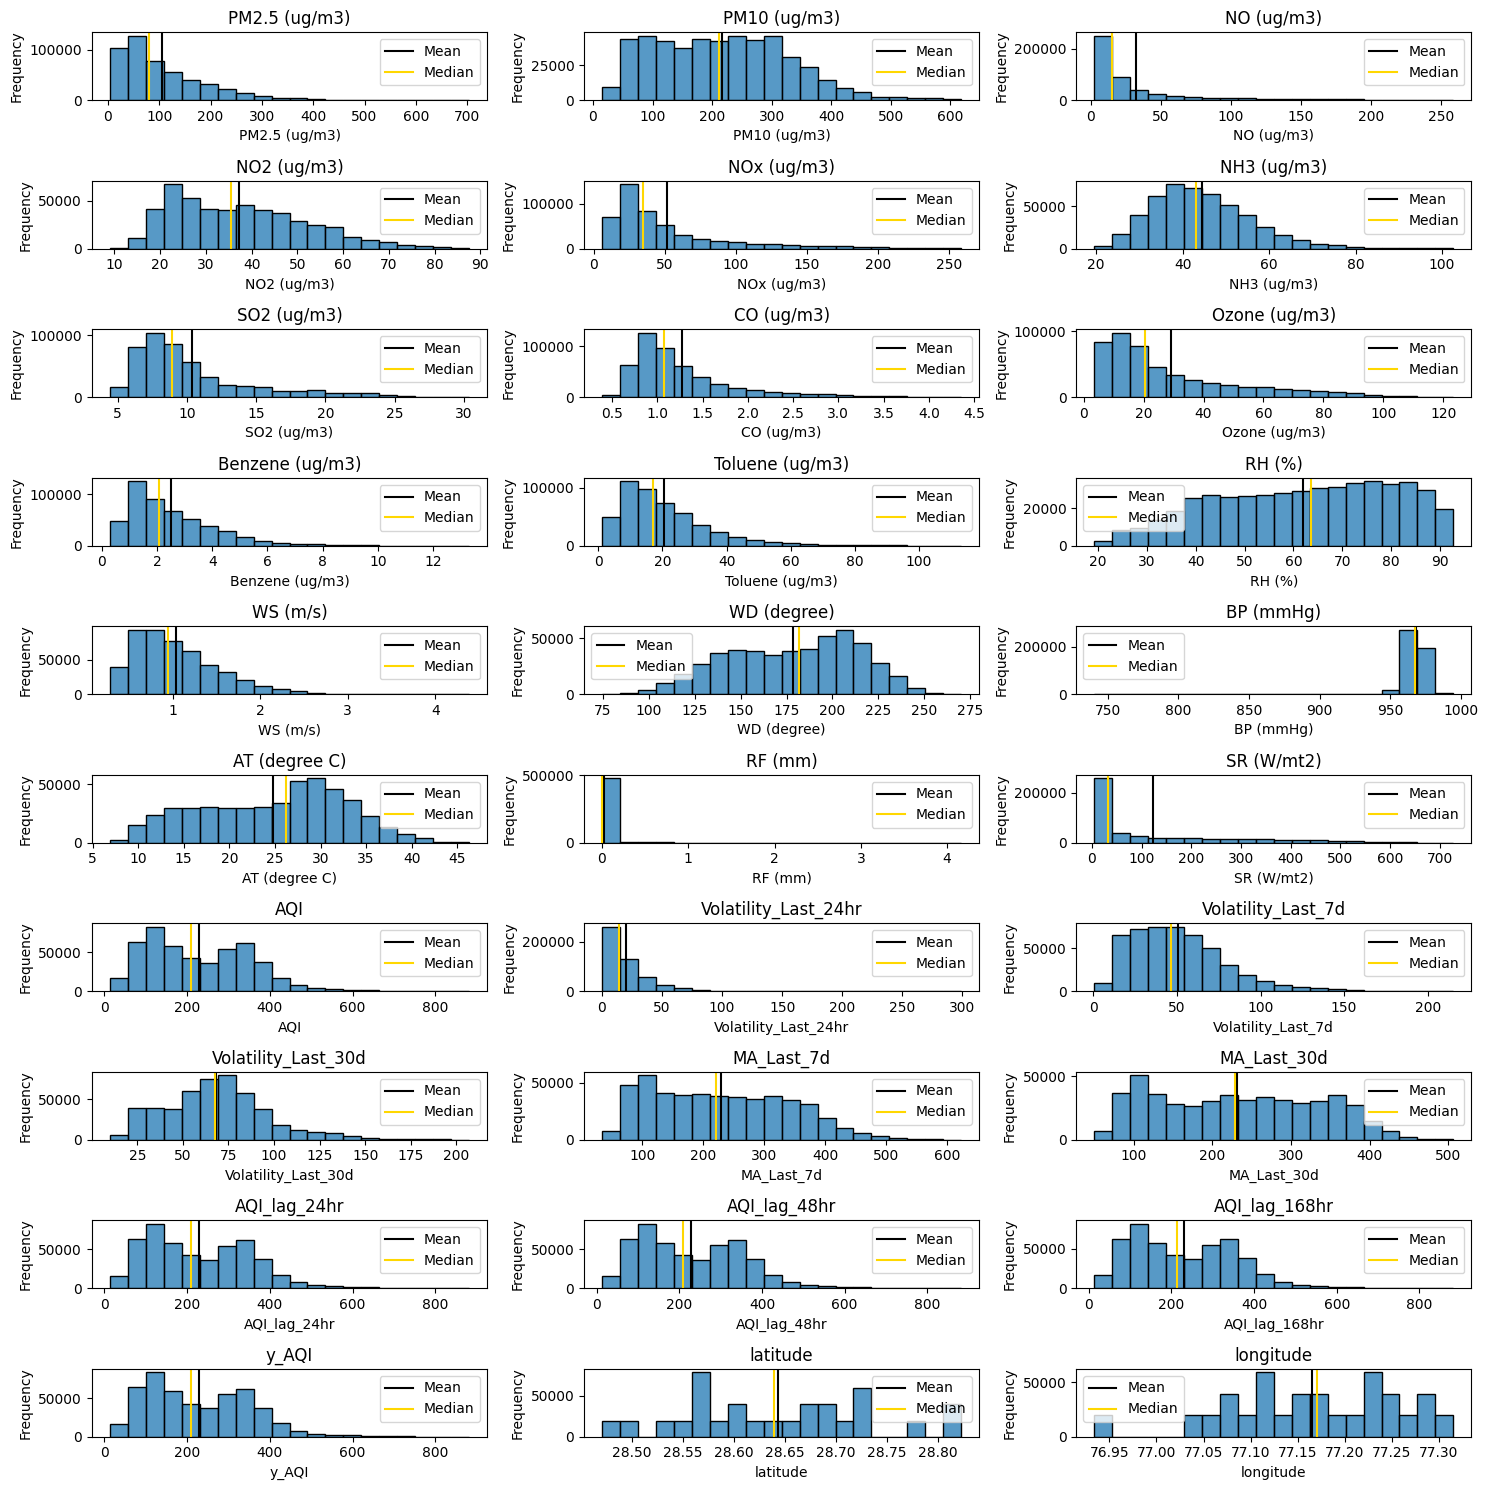

In [35]:
# Histograms: Distribution of Pollutants
selected_columns = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ug/m3)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (ug/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'BP (mmHg)', 'AT (degree C)', 'RF (mm)', 'SR (W/mt2)', 'AQI', 'Volatility_Last_24hr', 'Volatility_Last_7d', 'Volatility_Last_30d', 'MA_Last_7d', 'MA_Last_30d', 'AQI_lag_24hr', 'AQI_lag_48hr', 'AQI_lag_168hr', 'y_AQI', 'latitude', 'longitude']

# Calculate the number of rows needed based on the number of selected columns
num_rows = len(selected_columns) // 3 + (len(selected_columns) % 3 > 0)

# Decreased height of each chart
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 1.5 * num_rows))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Iterate through selected columns and plot histograms
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], bins=20, kde=False, ax=axes[i])
    axes[i].set_title(column)

    # Customize x and y label
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

    # Adding mean and median lines
    axes[i].axvline(df[column].mean(), c='black', label='Mean')
    axes[i].axvline(df[column].median(), c='gold', label='Median')
    axes[i].legend()

# Remove empty subplots
for i in range(len(selected_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

### Purpose of Adding Mean and Median Lines to Histogram

In a histogram depicting the distribution of a variable, the addition of mean and median lines serves the following purposes:

1. **Visualizing Central Tendency:**
    - **Mean (Average):** The mean is an indicator of the average value in the dataset. Adding a line at the mean provides a visual reference for the balancing point of the distribution, helping to understand where the data is centered.
    - **Median:** The median represents the middle value or central position in the dataset. Adding a line at the median provides insight into the distribution's central tendency and is particularly useful for assessing symmetry or skewness.

2. **Understanding Data Spread:**
    - These lines assist in gauging the spread of values around the central tendency. A tight clustering around the mean and median lines suggests less variability, while a broader spread indicates greater dispersion.

3. **Identifying Skewness:**
    - The relative position of the mean and median lines can indicate the presence and direction of skewness in the distribution. A discrepancy between the mean and median suggests potential skewness, with the mean being more influenced by extreme values.

By incorporating mean and median lines into the histogram, we gain valuable insights into the central characteristics and distributional properties of the data.


For now we can keep in mind that few features are right skewed, we can log transform those later before modeling.

Let's have a closer look at the distribution of our target variable

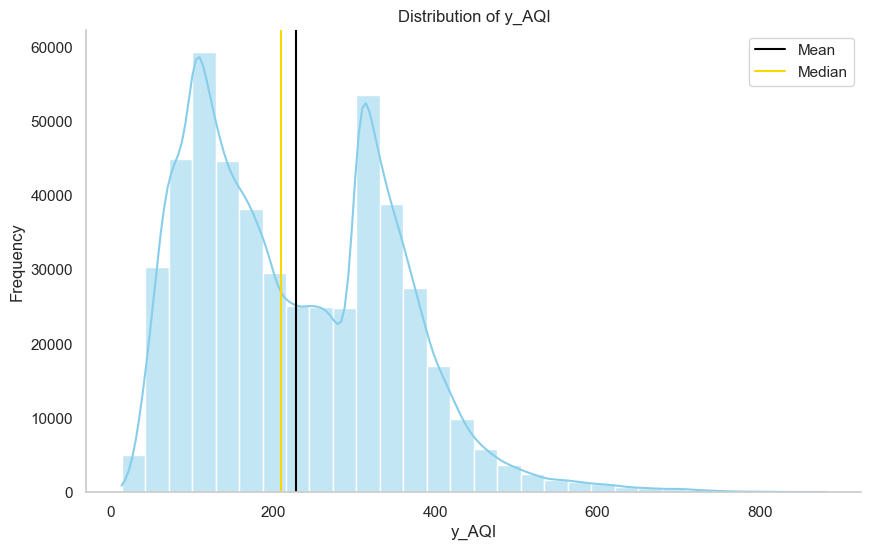

In [36]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram for the 'AQI' column
plt.figure(figsize=(10, 6))
sns.histplot(df['y_AQI'], bins=30, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of y_AQI')
plt.xlabel('y_AQI')
plt.ylabel('Frequency')

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

# Adding mean and median lines directly using plt.axvline()
plt.axvline(df['y_AQI'].mean(), c='black', label='Mean')
plt.axvline(df['y_AQI'].median(), c='gold', label='Median')
plt.legend()

# Display the plot
plt.show()


#### Finding:
* The histogram of y_AQI displays a subtle right skew, indicating a tendency towards higher concentrations. 
* Notably, the presence of two peaks suggests a bimodal distribution, signifying two distinct clusters of y_AQI values. The first peak represents higher concentrations, while the second indicates lower concentrations. This bimodal structure could be influenced by seasonal variations, specific pollution sources, or unique events impacting air quality. Understanding these patterns is crucial for identifying factors affecting air quality in the region.

### Correlation Heatmap
The correlation heatmap aids in identifying potential relationships and dependencies among variables. Positive or negative values indicate the strength and direction of the correlation, while values closer to 1 or -1 suggest a stronger linear relationship. This matrix quantifies the linear relationships between pairs of variables.

A list of columns is chosen for correlation analysis, including air quality metrics, weather parameters, volatility measures, and the target variable 'y_AQI'.

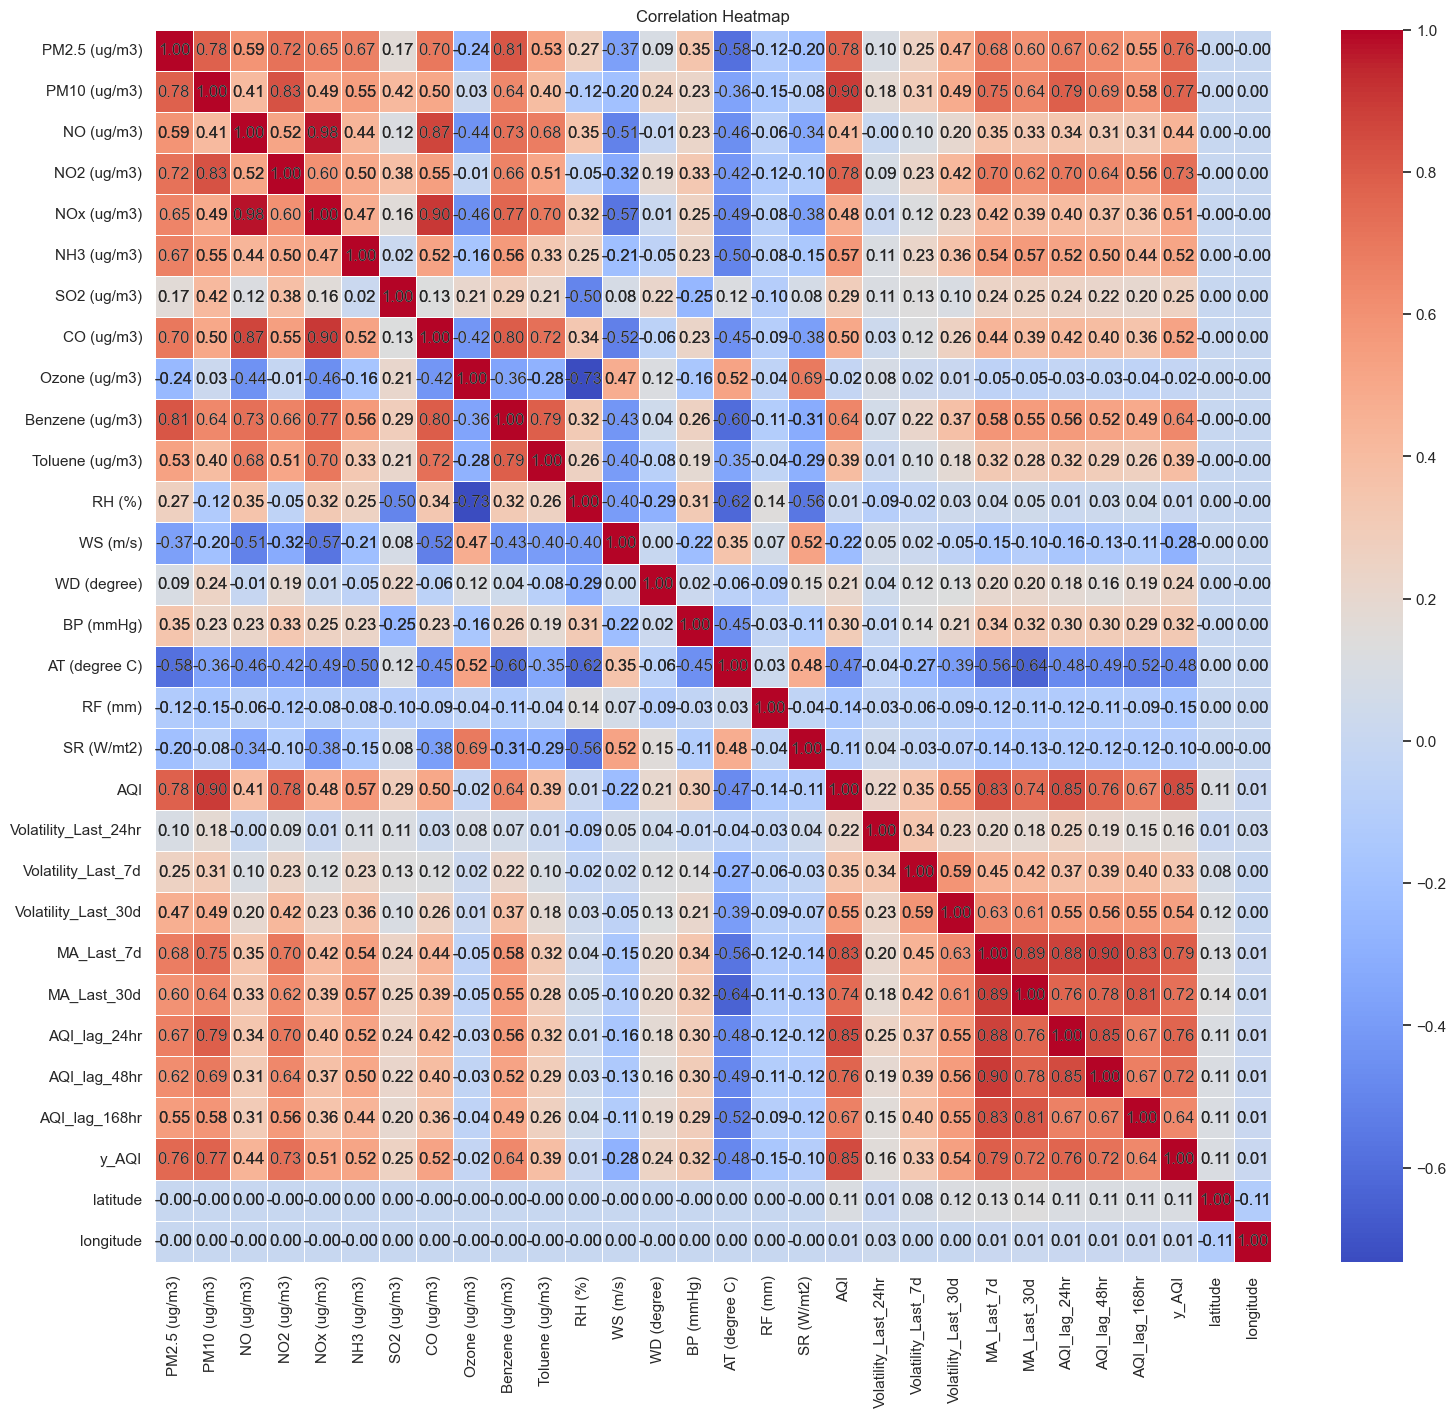

In [37]:
# Extract relevant columns for correlation heatmap
correlation_columns = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ug/m3)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (ug/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'BP (mmHg)', 'AT (degree C)', 'RF (mm)','SR (W/mt2)', 'AQI', 'Volatility_Last_24hr', 'Volatility_Last_7d',
       'Volatility_Last_30d', 'MA_Last_7d', 'MA_Last_30d', 'AQI_lag_24hr', 'AQI_lag_48hr', 'AQI_lag_168hr', 'y_AQI', 'latitude', 'longitude']

# Calculate the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 16))

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)

# Manually annotate the values
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center')

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

#### Finding:
These insights highlight the interrelationships among various air quality indicators and derived features in the dataset.

* The strong positive correlation between 'PM2.5' and 'PM10' particles is anticipated, as they both originate from similar sources and represent different sizes of particulate matters.

* high positive correlation between 'MA_Last7D' and 'MA_Last30D' is expected, as both are calculated from the same source (AQI), capturing trends over different time intervals.

* The high correlation of 'MA_Last7D' and 'MA_Last30D' with the 'AQI' and 'y_AQI' column is expected, given that both are derived from the 'AQI' column.

* 'Volatility_Last7D' and 'Volatility_Last30D' show a positive correlation, which is reasonable since they represent calculated moving averages across 7 days and 30 days, respectively.

* The columns related to lagged AQI values ('aqi_lagg') exhibit a strong correlation with the 'y_AQI' column, as they are derived from the same source(AQI).

* The high correlation (0.54) between 'Benzene' and 'Toluene' indicates a noteworthy association between these two chemical components.

* The strong positive correlation among NO, NO2, and NOx is understandable, reflecting common emission sources and the chemical transformations in the atmosphere, where NO serves as a precursor to NO2.

#### Further analysis into the relationship between each feature and the target variable:
Calculation and visualization of the correlation coefficients between various features and the target variable 'y_AQI' in the dataset, helping identify potentially influential predictors.

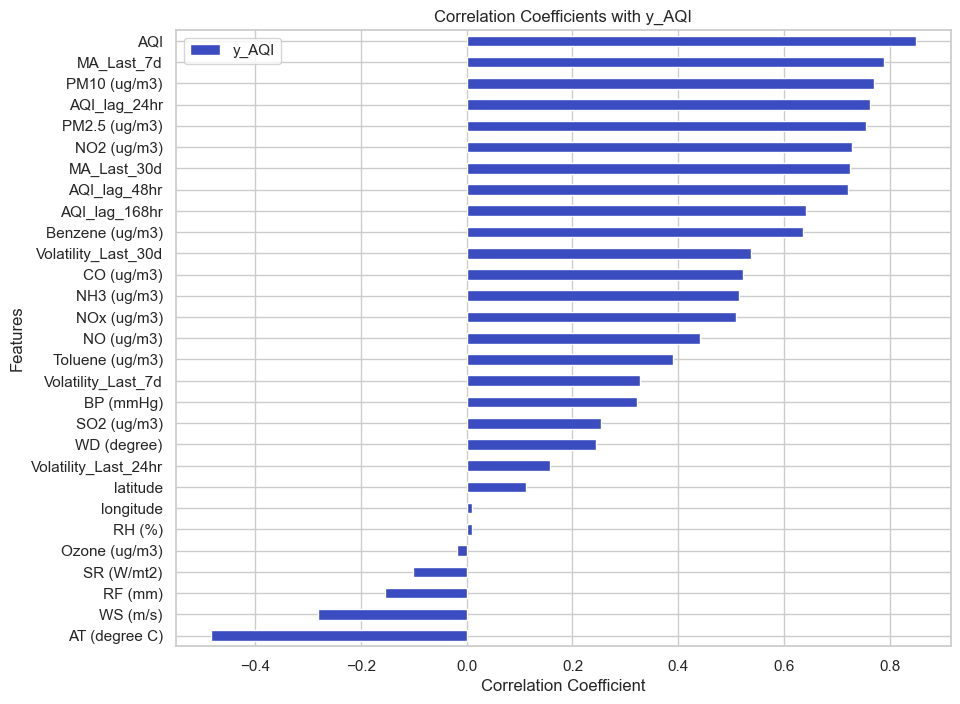

In [38]:
# Extract the correlation coefficients between 'y_AQI' and other features from the correlation matrix and sort these coefficients in ascending order.
y_aqi_correlation = correlation_matrix['y_AQI'].drop(['y_AQI']).sort_values(ascending=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot a horizontal bar chart to visualize the strength and direction of correlation for each feature with 'y_AQI'
y_aqi_correlation.plot(kind='barh', cmap='coolwarm', legend=True)
plt.title('Correlation Coefficients with y_AQI')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Show the plot
plt.show()

Creating a new dataframe called "chart_df" specifically for visualization purpose

In [39]:
chart_df = df.copy()

# Create 'Year_Month' column with the 1st day of every month
chart_df['YearMonth'] = chart_df['Datetime'].dt.to_period('M').dt.to_timestamp()

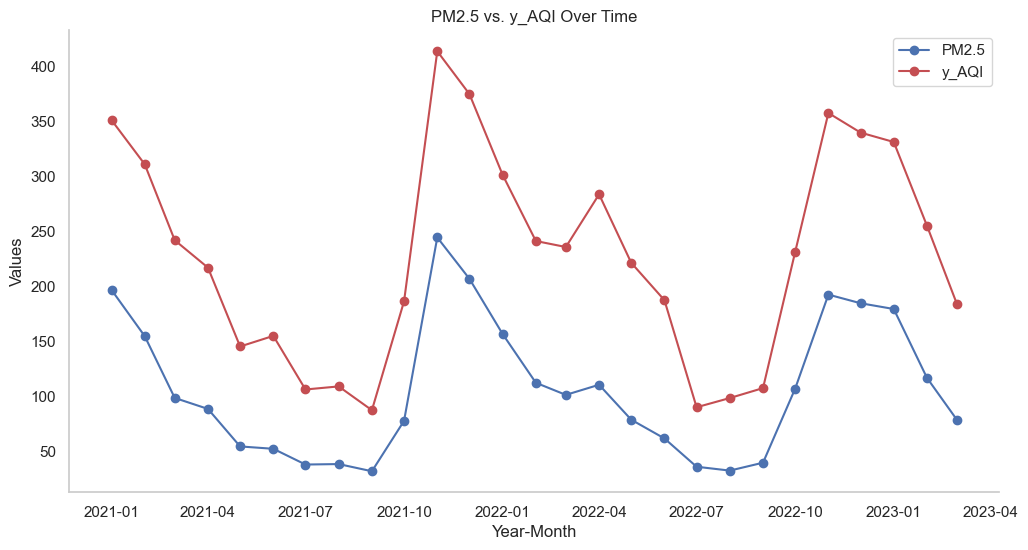

In [40]:
# Convert 'YearMonth' to datetime format
chart_df['YearMonth'] = pd.to_datetime(chart_df['YearMonth'])

# Group by 'YearMonth' and calculate mean PM2.5 and y_AQI
pm25_aqi_mean = chart_df.groupby('YearMonth')[['PM2.5 (ug/m3)', 'y_AQI']].mean().reset_index()

# Create a line chart for the relationship between PM2.5 and y_AQI
plt.figure(figsize=(12, 6))
plt.plot(pm25_aqi_mean['YearMonth'], pm25_aqi_mean['PM2.5 (ug/m3)'], marker='o', linestyle='-', color='b', label='PM2.5')
plt.plot(pm25_aqi_mean['YearMonth'], pm25_aqi_mean['y_AQI'], marker='o', linestyle='-', color='r', label='y_AQI')

# Customize the plot
plt.title('PM2.5 vs. y_AQI Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

### Hypothesis Test: Correlation between 'PM2.5 (ug/m3)' and 'y_AQI'

Let's investigate if there's a significant linear correlation between 'PM2.5 (ug/m3)' and 'y_AQI'.

**Hypotheses:**
- **H0:** There is no significant correlation between the two variables.
- **H1:** There is a significant correlation between the two.

**Statistical Test:** Pearson Correlation Test

**Decision Rule:**
- If p-value < 0.05, reject Null Hypothesis(H0).
- If p-value ≥ 0.05, fail to reject H0.

In [41]:
import scipy.stats as stats

# Extract the relevant columns
feature = chart_df['PM2.5 (ug/m3)']
target = chart_df['y_AQI']

# Perform the Pearson correlation test
# Using scipy.stats.pearsonr to compute the correlation coefficient and p-value.
correlation_coefficient, p_value = stats.pearsonr(feature, target)

print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4e}")

Correlation Coefficient: 0.7561
P-value: 0.0000e+00


**Results:**
- **Correlation Coefficient:** 0.76
- **P-value:** 0.0

**Conclusion:**
- We can see that a significantly small p-value(0.0) which is less than 0.05, we can safely reject the null hypothesis, i.e, there is a significant correlation.
- A correlation coefficient of 0.76 indicates a strong positive correlation. This means that as the 'PM2.5 (ug/m3)' values increase, the 'y_AQI' values tend to increase as well.
- With a p-value of 0.0, the result is statistically significant. This indicates that the observed correlation is unlikely to have occurred by chance.
### Visualization: Scatter Plot with Regression Line for 'PM2.5 (ug/m3)' vs. 'y_AQI'

**Objective:** Visualize the linear correlation between 'PM2.5 (ug/m3)' and 'y_AQI'

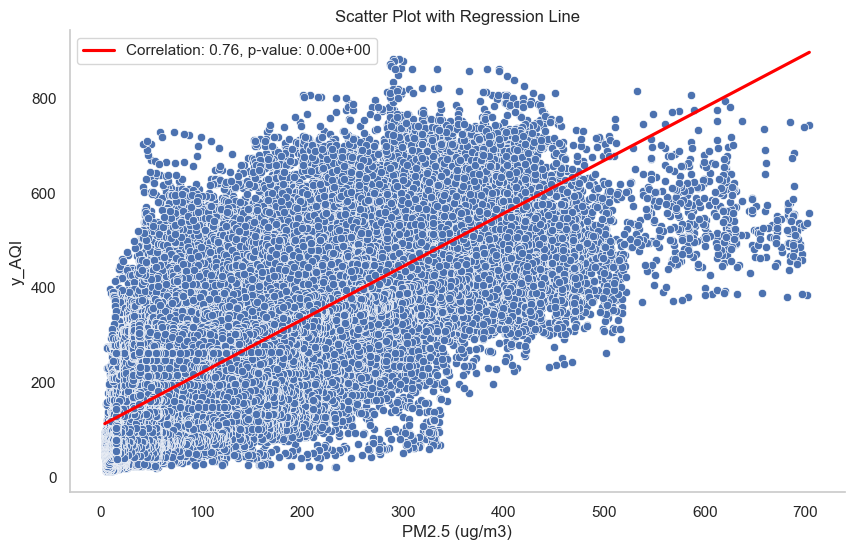

In [42]:
# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of 'PM2.5 (ug/m3)' against 'y_AQI'
sns.scatterplot(x='PM2.5 (ug/m3)', y='y_AQI', data=chart_df)

# overlay a Regression Line on the scatter plot
sns.regplot(x='PM2.5 (ug/m3)', y='y_AQI', data=chart_df, scatter=False, color='r', label=f'Correlation: {correlation_coefficient:.2f}, p-value: {p_value:.2e}')

# Customize the plot
# Set plot title, x-axis label, y-axis label, legend, and grid
plt.title('Scatter Plot with Regression Line')
plt.xlabel('PM2.5 (ug/m3)')
plt.ylabel('y_AQI')
plt.legend()
plt.grid(True)

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

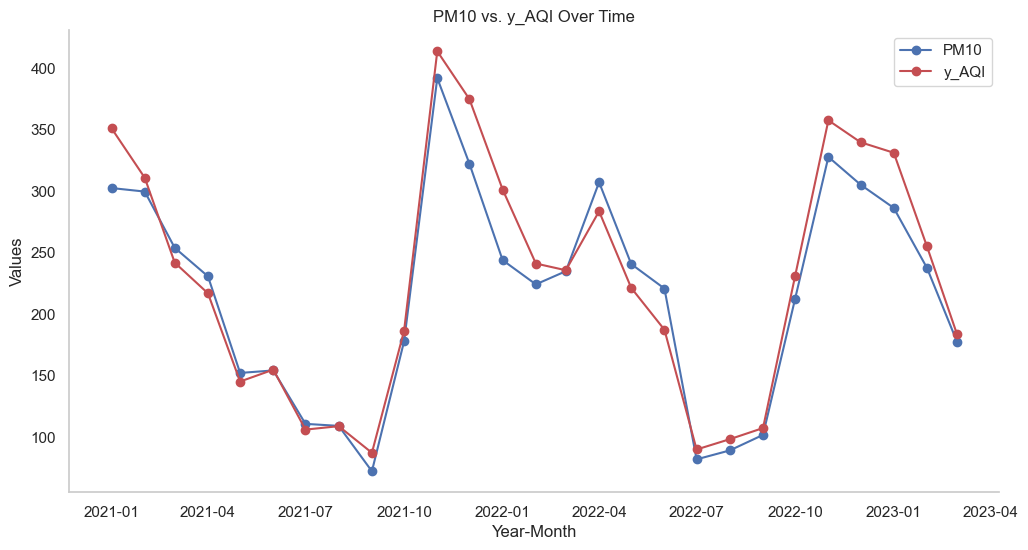

In [43]:
# Convert 'YearMonth' to datetime format
chart_df['YearMonth'] = pd.to_datetime(chart_df['YearMonth'])

# Group by 'YearMonth' and calculate mean PM10 and y_AQI
pm10_aqi_mean = chart_df.groupby('YearMonth')[['PM10 (ug/m3)', 'y_AQI']].mean().reset_index()

# Create a line chart for the relationship between PM10 and y_AQI
plt.figure(figsize=(12, 6))
plt.plot(pm10_aqi_mean['YearMonth'], pm10_aqi_mean['PM10 (ug/m3)'], marker='o', linestyle='-', color='b', label='PM10')
plt.plot(pm10_aqi_mean['YearMonth'], pm10_aqi_mean['y_AQI'], marker='o', linestyle='-', color='r', label='y_AQI')

# Customize the plot
plt.title('PM10 vs. y_AQI Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

In [44]:
# Hypothesis test for correlation
correlation_coefficient, p_value = stats.pearsonr(chart_df['PM10 (ug/m3)'], chart_df['y_AQI'])

print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4e}")

Correlation Coefficient: 0.7702
P-value: 0.0000e+00


**Finding:**

- A very small p-value (0.0), below the commonly used threshold of 0.05, provides robust evidence to reject the null hypothesis, indicating a significant correlation between 'PM10 (ug/m3)' and 'y_AQI'.

- The correlation coefficient of 0.7702 denotes a strong positive correlation. Higher 'PM10 (ug/m3)' values are associated with higher 'y_AQI' values.

- The statistical significance of the p-value (0.0) reinforces that the observed correlation is highly improbable by chance, emphasizing the meaningful relationship between 'PM10 (ug/m3)' and 'y_AQI'.

### Visualization: Scatter Plot with Regression Line for 'PM10 (ug/m3)' vs. 'y_AQI'

**Objective:** Visualize the linear correlation between 'PM10 (ug/m3)' and 'y_AQI'

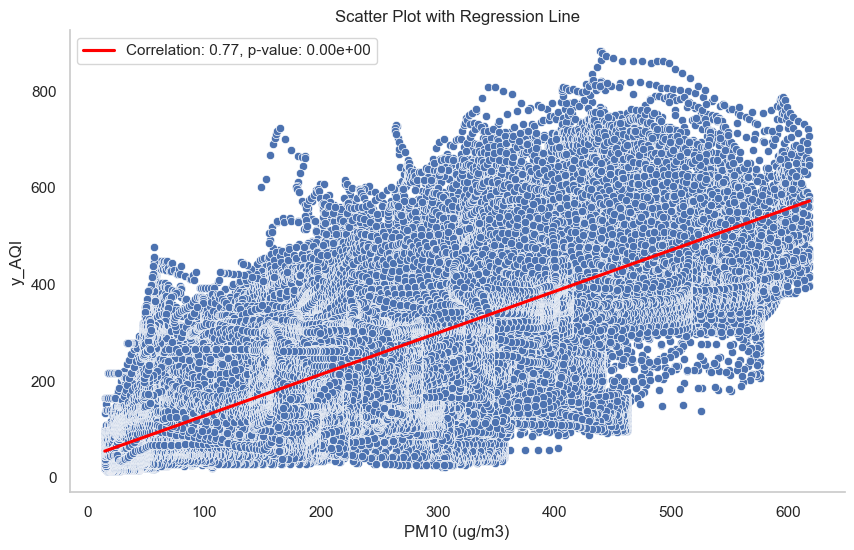

In [45]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM10 (ug/m3)', y='y_AQI', data=chart_df)

# Plotting the regression line
sns.regplot(x='PM10 (ug/m3)', y='y_AQI', data=chart_df, scatter=False, color='r', label=f'Correlation: {correlation_coefficient:.2f}, p-value: {p_value:.2e}')

# Customize the plot
plt.title('Scatter Plot with Regression Line')
plt.xlabel('PM10 (ug/m3)')
plt.ylabel('y_AQI')
plt.legend()

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

**Factors Contributing to the Strong Correlation Between NO2 and y_AQI:**

1. **Shared Emission Sources:** NO2, emitted from combustion in vehicles and industries, may share sources with other pollutants affecting y_AQI.

2. **Chemical Interactions:** NO2 undergoes atmospheric reactions, forming secondary pollutants that contribute to overall air quality and impact the y_AQI.

3. **Meteorological Influences:** NO2 levels are affected by temperature, wind speed, and atmospheric stability, influencing the forecasted y_AQI.

4. **Consistent Spatial and Temporal Patterns:** Similar distribution patterns of NO2 and other pollutants influencing y_AQI contribute to the observed strong correlation.

**Hypothesis Test: NO2 and y_AQI**

**Null Hypothesis (H0):** There is no significant correlation between NO2 levels and the forecasted y_AQI.

**Alternative Hypothesis (H1):** There is a significant correlation between NO2 levels and the forecasted y_AQI.

**Test Statistic:**

In [46]:
# Hypothesis Test
correlation_coefficient, p_value = stats.pearsonr(chart_df['NO2 (ug/m3)'], chart_df['y_AQI'])
print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4e}")

Correlation Coefficient: 0.7289
P-value: 0.0000e+00


**Result Interpretation:**

- A very small p-value (0.0), below the commonly used threshold of 0.05, provides robust evidence to reject the null hypothesis, indicating a significant correlation between 'NO2 (ug/m3)' and 'y_AQI'.

- The correlation coefficient of 0.7289 denotes a strong positive correlation. Higher 'NO2 (ug/m3)' values are associated with higher 'y_AQI' values.

- The statistical significance of the p-value (0.0) reinforces that the observed correlation is highly improbable by chance, emphasizing the meaningful relationship between 'NO2 (ug/m3)' and 'y_AQI'.

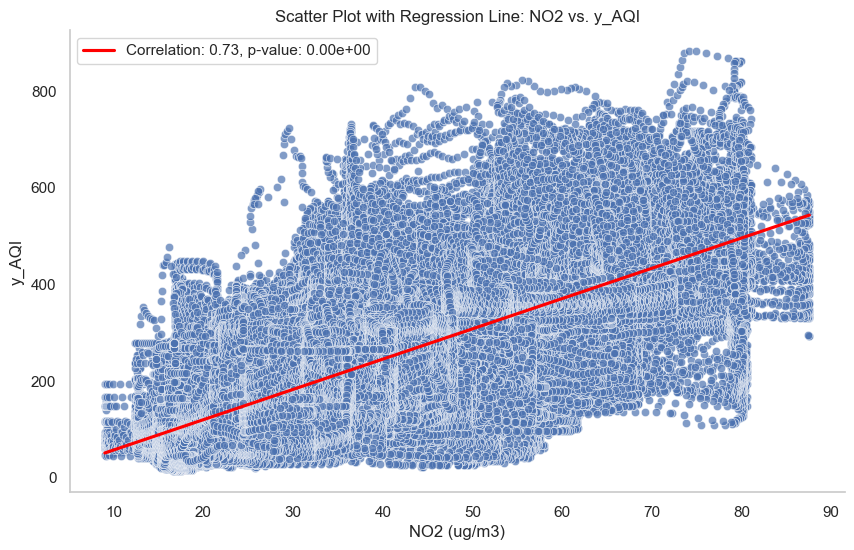

In [47]:
# Scatter plot with Regression Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO2 (ug/m3)', y='y_AQI', data=chart_df, alpha=0.7)

# Plotting the regression line
sns.regplot(x='NO2 (ug/m3)', y='y_AQI', data=chart_df, scatter=False, color='r', label=f'Correlation: {correlation_coefficient:.2f}, p-value: {p_value:.2e}')

# Customize the plot
plt.title('Scatter Plot with Regression Line: NO2 vs. y_AQI')
plt.xlabel('NO2 (ug/m3)')
plt.ylabel('y_AQI')
plt.legend()

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

## Exploring the Relationship Between Weather Data and Target Variable 'y_AQI'

Now, we will examine the association between the weather data and our target variable 'y_AQI'.

Columns to Plot: ['RH (%)', 'WS (m/s)', 'WD (degree)', 'BP (mmHg)', 'AT (degree C)', 'RF (mm)', 'SR (W/mt2)', 'y_AQI']


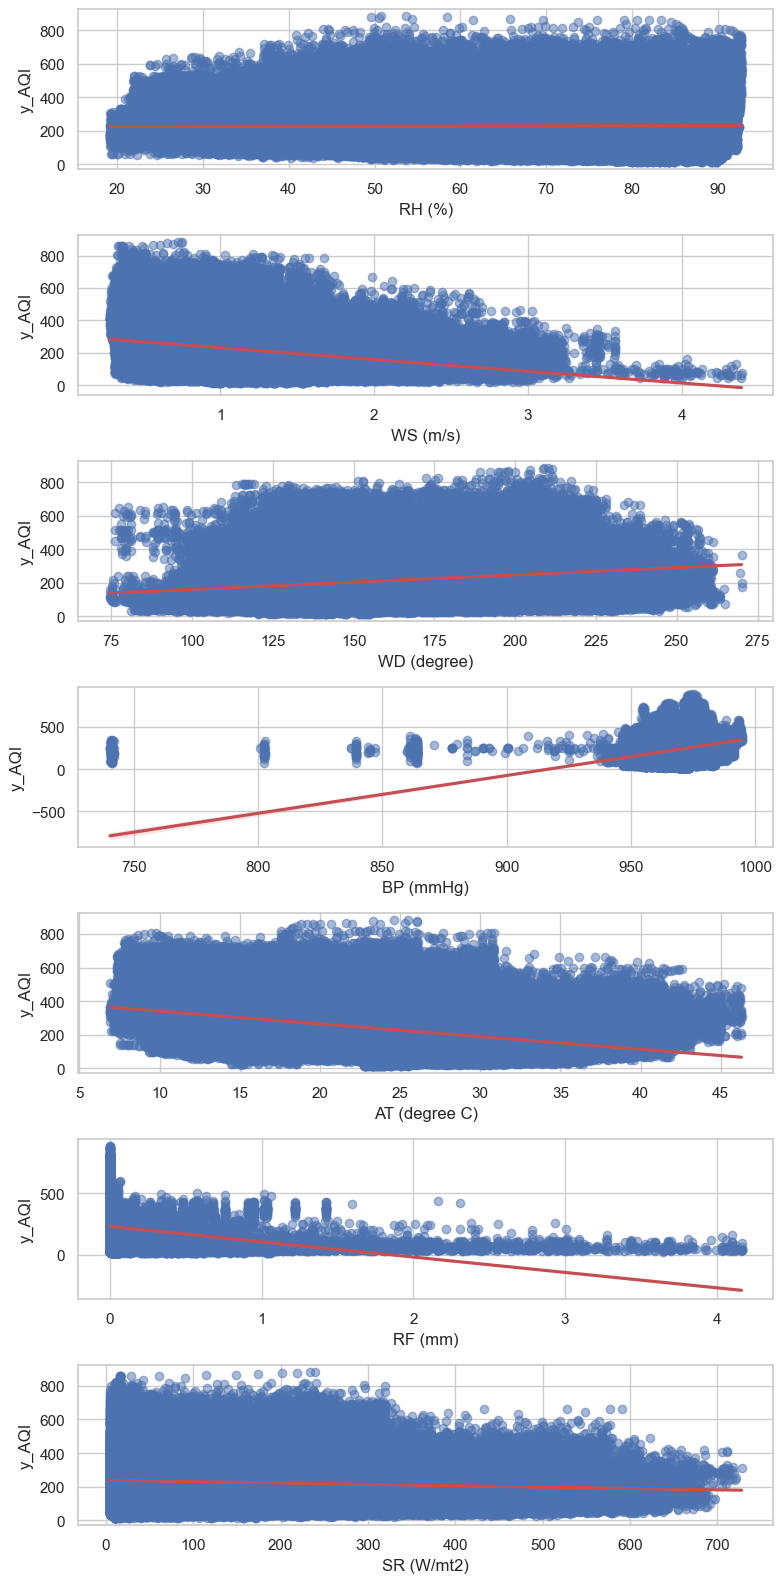

In [67]:
columns_to_plot = ['RH (%)', 'WS (m/s)', 'WD (degree)', 'BP (mmHg)', 'AT (degree C)', 'RF (mm)', 'SR (W/mt2)', 'y_AQI']

# Print the list of columns for plotting
print("Columns to Plot:", columns_to_plot)

# Selecting relevant columns from the DataFrame
df_selected = df[columns_to_plot]

# Setting up the subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot)-1, ncols=1, figsize=(8, 2 * len(columns_to_plot)))

# Plotting individual scatter plots with regression lines
for i, col in enumerate(columns_to_plot[:-1]):
    ax = axes[i]
    sns.regplot(x=col, y=columns_to_plot[-1], data=df_selected, ax=ax, color='b', scatter_kws={'alpha':0.5}, line_kws={'color': 'r'})
    ax.set_xlabel(col)
    ax.set_ylabel(columns_to_plot[-1])

plt.tight_layout()
plt.show()

### Validating Relationships: Hypothesis Testing After Scatter Plots
Performing hypothesis testing after scatter plots enhances understanding by validating visual patterns, confirming statistical significance, identifying relevant variables, aiding decision-making, and adding rigor to statistical analysis. It ensures a comprehensive and robust approach, guiding subsequent analytical steps.

In [49]:
from scipy.stats import pearsonr

# Select relevant columns
selected_features = ['RH (%)', 'WS (m/s)', 'WD (degree)', 'BP (mmHg)', 'AT (degree C)', 'RF (mm)', 'SR (W/mt2)']
target_variable = 'y_AQI'

# Loop through selected features and calculate correlation
for feature in selected_features:
    correlation_coefficient, p_value = pearsonr(df[feature], df[target_variable])
    correlation_coefficient = round(correlation_coefficient, 2)
    p_value = round(p_value, 2)
    print(f"Correlation between {feature} and {target_variable}: {correlation_coefficient}, p-value: {p_value}")


Correlation between RH (%) and y_AQI: 0.01, p-value: 0.0
Correlation between WS (m/s) and y_AQI: -0.28, p-value: 0.0
Correlation between WD (degree) and y_AQI: 0.24, p-value: 0.0
Correlation between BP (mmHg) and y_AQI: 0.32, p-value: 0.0
Correlation between AT (degree C) and y_AQI: -0.48, p-value: 0.0
Correlation between RF (mm) and y_AQI: -0.15, p-value: 0.0
Correlation between SR (W/mt2) and y_AQI: -0.1, p-value: 0.0


Let's interpret the results:

**RH (%)**: A very small positive correlation (0.01) with 'y_AQI'. The p-value (0.00) suggests that this correlation is statistically significant, but the strength of the correlation is very weak.

**WS (m/s)**: A moderate negative correlation (-0.28) with 'y_AQI'. The p-value (0.00) indicates that this negative correlation is statistically significant. This suggests that as wind speed increases, 'y_AQI' tends to decrease.

**WD (degree)**: A moderate positive correlation (0.24) with 'y_AQI'. The p-value (0.00) suggests statistical significance. It implies that as wind direction increases, 'y_AQI' tends to increase.

**BP (mmHg)**: A moderate positive correlation (0.32) with 'y_AQI'. The p-value (0.00) indicates statistical significance. This suggests that as atmospheric pressure increases, 'y_AQI' tends to increase.

**AT (degree C)**: A strong negative correlation (-0.48) with 'y_AQI'. The p-value (0.00) suggests statistical significance. This indicates that as temperature increases, 'y_AQI' tends to decrease.

**RF (mm)**: A small negative correlation (-0.15) with 'y_AQI'. The p-value (0.00) indicates statistical significance. This suggests that as rainfall increases, 'y_AQI' tends to decrease.

**SR (W/mt2)**: A small negative correlation (-0.10) with 'y_AQI'. The p-value (0.00) suggests statistical significance. This implies that as solar radiation increases, 'y_AQI' tends to decrease.

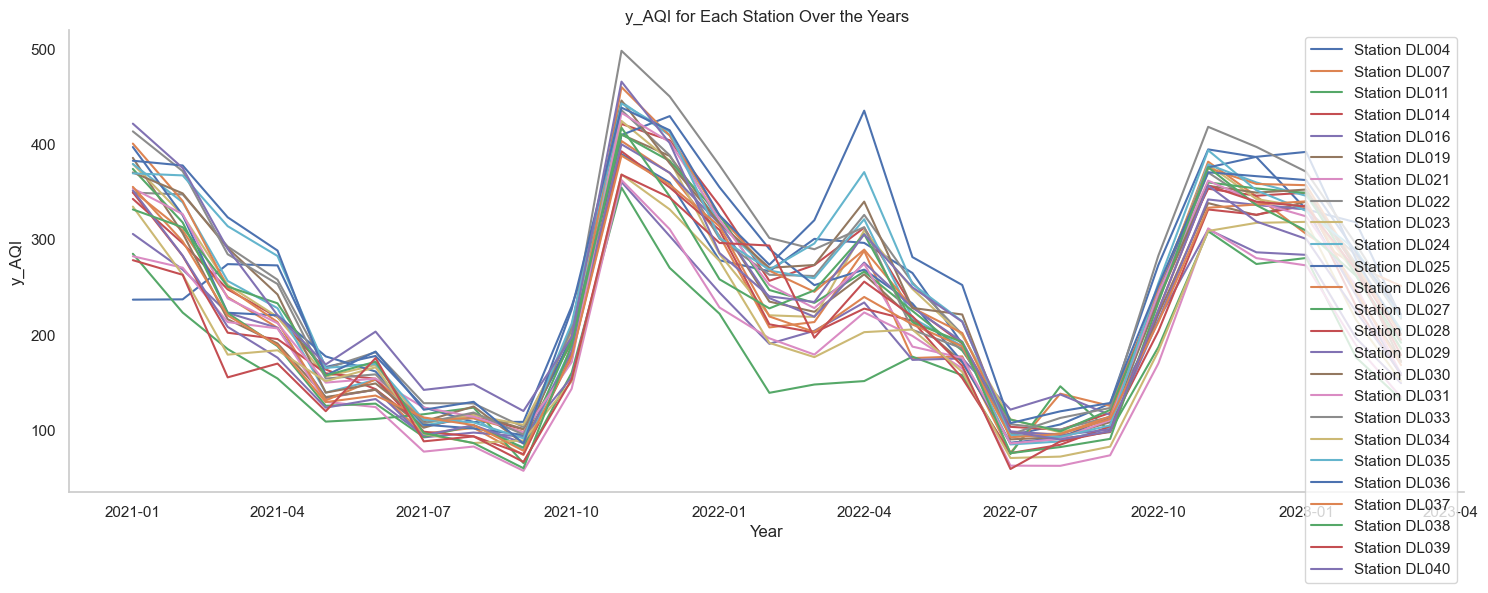

In [50]:
# Group by 'StationId' and 'Year', calculate mean y_AQI
station_level_chart_df = chart_df.groupby(['StationId', 'YearMonth'])['y_AQI'].mean().reset_index()

# Create a line chart for each StationId
plt.figure(figsize=(18, 6))

# Plot y_AQI for each station over the years
for station_id in station_level_chart_df['StationId'].unique():
    station_data = station_level_chart_df[station_level_chart_df['StationId'] == station_id]
    plt.plot(station_data['YearMonth'], station_data['y_AQI'], label=f'Station {station_id}')

# Customize the plot
plt.title('y_AQI for Each Station Over the Years')
plt.xlabel('Year')
plt.ylabel('y_AQI')
plt.legend()
plt.grid(True)

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

/var/folders/7l/pjbgsg_54hn3t90_14n49nmm0000gq/T/ipykernel_3681/2328492396.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_counts = chart_df.groupby(['Month', 'AQI_Category']).size().reset_index(name='Count')


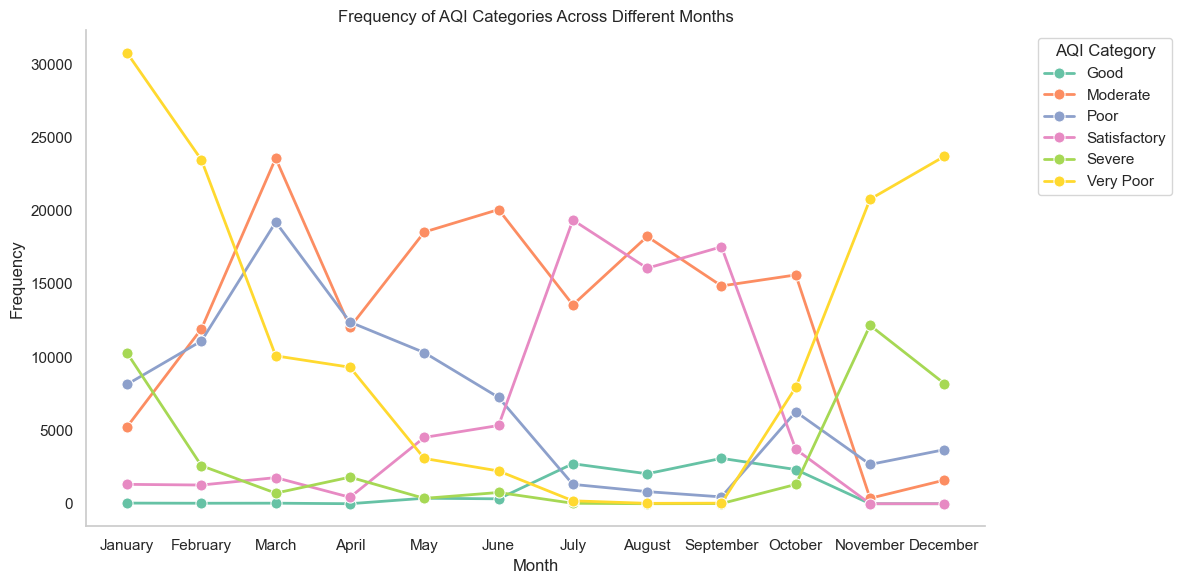

In [51]:
# Copy the 'Month' column to chart_df
chart_df['Month'] = df['Month'].copy()

# Map numeric values to month names in the chart_df DataFrame
chart_df['Month'] = chart_df['Month'].apply(lambda x: calendar.month_name[int(x)])

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' to categorical with specified order in the chart_df DataFrame
chart_df['Month'] = pd.Categorical(chart_df['Month'], categories=month_order, ordered=True)

# Create a DataFrame with counts
df_counts = chart_df.groupby(['Month', 'AQI_Category']).size().reset_index(name='Count')

# Line Plot: Frequency of AQI categories across different months
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Count', hue='AQI_Category', data=df_counts, palette='Set2', marker='o', markersize=8, linewidth=2)
plt.title('Frequency of AQI Categories Across Different Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='AQI Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot

# Remove the top and right spines
sns.despine()

# Turn off the grid
plt.grid(False)

plt.tight_layout()
plt.show()


In [52]:
chart_df = df.copy()

In [53]:
chart_df.head()

Datetime StationId  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0 2021-01-01     DL004     363.873333    327.733876  137.860580    49.843756   
1 2021-01-01     DL007     363.873333    328.043690  137.860580    49.864090   
2 2021-01-01     DL011     365.559583    328.357307  138.026667    49.884244   
3 2021-01-01     DL014     366.236667    328.671352  138.017681    49.904217   
4 2021-01-01     DL016     367.736389    328.989126  141.738261    49.925545   

   NOx (ug/m3)  NH3 (ug/m3)  SO2 (ug/m3)  CO (ug/m3)  ...  \
0   153.558696    60.277424     9.421631    3.591000  ...   
1   153.558696    60.277424     9.425902    3.591000  ...   
2   153.490870    60.277424     9.430173    3.601857  ...   
3   153.309710    60.332273     9.434156    3.607571  ...   
4   150.962941    60.332273     9.438139    3.636143  ...   

   Volatility_Last_30d  MA_Last_7d  MA_Last_30d  y_AQI  AQI_lag_24hr  \
0            97.872474  277.660714   299.656944  444.0         214.0   
1            66.307935  350.577381   359.443056  517.0         333.0   
2            71.839095  298.702381   296.847222  471.0         314.0   
3            78.837344  346.255952   364.241667  680.0         326.0   
4            98.204325  318.369048   326.927778  448.0         322.0   

   AQI_lag_48hr  AQI_lag_168hr  AQI_Category   latitude  longitude  
0         268.0          451.0          Poor  28.609090  77.032541  
1         312.0          448.0     Very Poor  28.725650  77.201157  
2         248.0          390.0     Very Poor  28.470691  77.109936  
3         306.0          457.0        Severe  28.674045  77.131023  
4         264.0          445.0     Very Poor  28.562776  77.118005  

[5 rows x 37 columns]

<Figure size 1500x600 with 0 Axes>

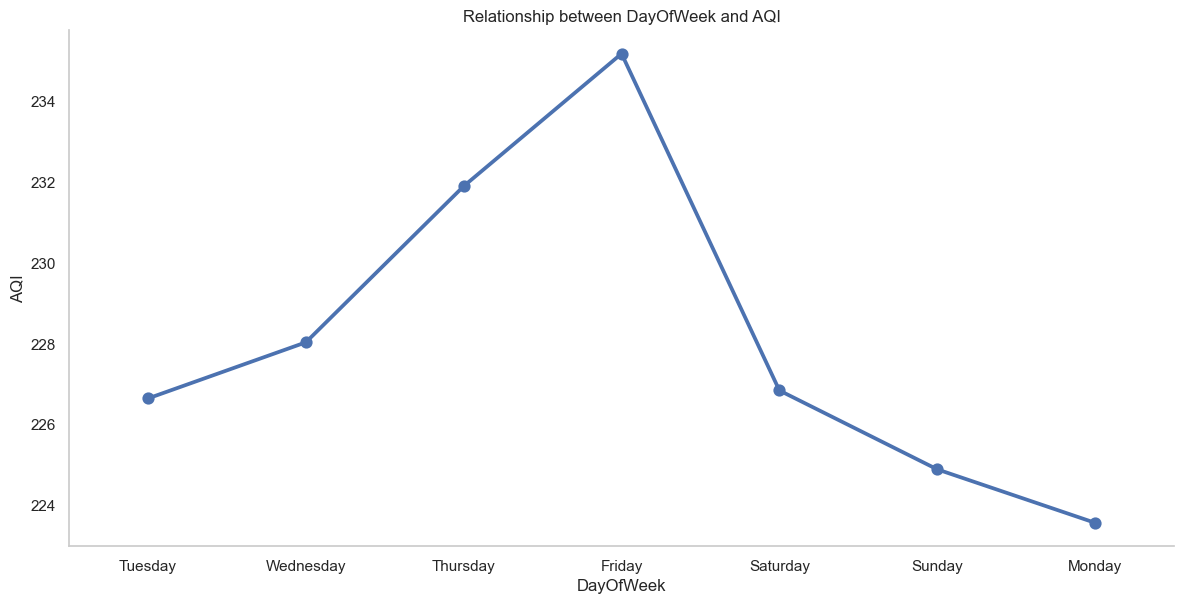

In [54]:
# Define the order of days starting from Sunday
day_order = ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']

# Map numerical DayOfWeek to corresponding names
chart_df['DayOfWeek_Name'] = chart_df['DayOfWeek'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Line Plot: Relationship between "DayOfWeek" and "AQI"
plt.figure(figsize=(15, 6))
sns.catplot(x='DayOfWeek_Name', y='AQI', data=chart_df, kind='point', height=6, aspect=2, errorbar=None, marker='o', color='b', linestyle='-', order=day_order)

# Remove spines
sns.despine()

# Remove grids
plt.grid(False)

plt.title('Relationship between DayOfWeek and AQI')
plt.xlabel('DayOfWeek')
plt.ylabel('AQI')
plt.show()

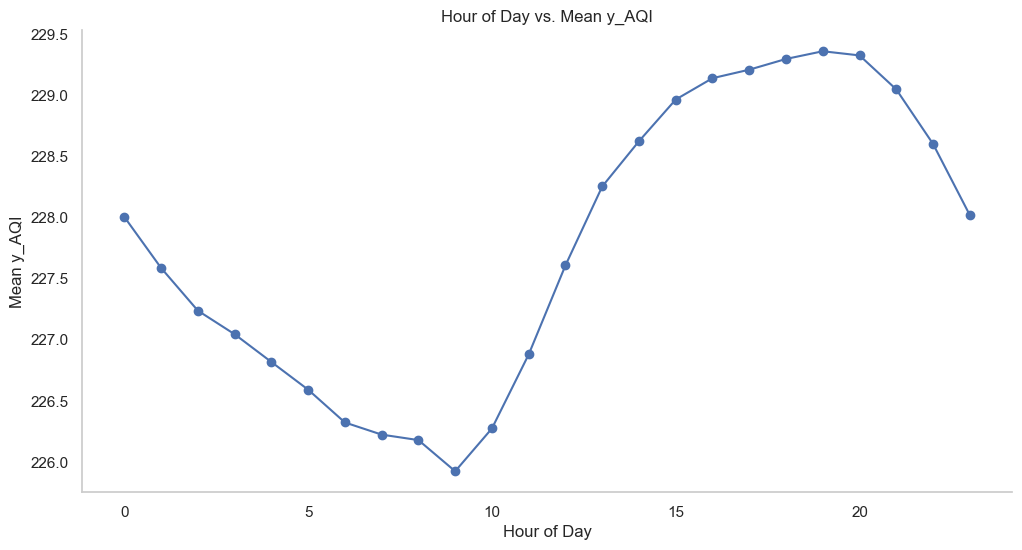

In [57]:
# Convert 'YearMonth' and 'HourOfDay' to datetime format
chart_df['HourOfDay'] = chart_df['HourOfDay'].astype(int)

# Group by 'HourOfDay' and calculate mean y_AQI
hourly_mean_aqi = chart_df.groupby('HourOfDay')['y_AQI'].mean().reset_index()

# Create a line chart for the relationship between HourOfDay and y_AQI
plt.figure(figsize=(12, 6))
plt.plot(hourly_mean_aqi['HourOfDay'], hourly_mean_aqi['y_AQI'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Hour of Day vs. Mean y_AQI')
plt.xlabel('Hour of Day')
plt.ylabel('Mean y_AQI')
plt.grid(True)

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

/var/folders/7l/pjbgsg_54hn3t90_14n49nmm0000gq/T/ipykernel_81088/2602297407.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')


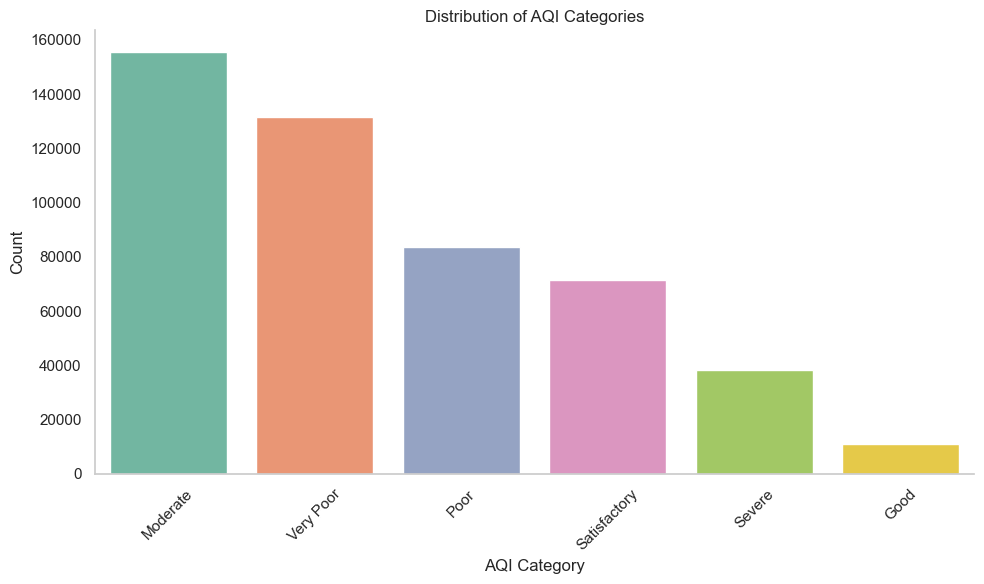

In [ ]:
# Count the occurrences of each AQI category
category_counts = df['AQI_Category'].value_counts()

# Bar Plot: Distribution of AQI categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
plt.title('Distribution of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove the top and right spines
sns.despine()

# Turn off the grid
plt.grid(False)

plt.tight_layout()
plt.show()

In [ ]:
df.head()

Datetime StationId  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0 2021-01-01     DL004     363.873333    327.733876  137.860580    49.843756   
1 2021-01-01     DL007     363.873333    328.043690  137.860580    49.864090   
2 2021-01-01     DL011     365.559583    328.357307  138.026667    49.884244   
3 2021-01-01     DL014     366.236667    328.671352  138.017681    49.904217   
4 2021-01-01     DL016     367.736389    328.989126  141.738261    49.925545   

   NOx (ug/m3)  NH3 (ug/m3)  SO2 (ug/m3)  CO (ug/m3)  ...  t_PM2.5 (ug/m3)  \
0   153.558696    60.277424     9.421631    3.591000  ...         5.899550   
1   153.558696    60.277424     9.425902    3.591000  ...         5.899550   
2   153.490870    60.277424     9.430173    3.601857  ...         5.904161   
3   153.309710    60.332273     9.434156    3.607571  ...         5.906007   
4   150.962941    60.332273     9.438139    3.636143  ...         5.910082   

   t_NO (ug/m3)  t_NOx (ug/m3)  t_SO2 (ug/m3)  t_CO (ug/m3)  \
0      4.933470       5.040574       2.343884      1.524098   
1      4.933470       5.040574       2.344293      1.524098   
2      4.934666       5.040135       2.344703      1.526460   
3      4.934601       5.038962       2.345085      1.527701   
4      4.961013       5.023637       2.345466      1.533883   

   t_Benzene (ug/m3)  t_Toluene (ug/m3)  t_Volatility_Last_24hr  \
0           2.238454           3.865414                2.904512   
1           2.238454           3.865414                2.703665   
2           2.238454           3.865414                1.970355   
3           2.242210           3.865800                3.370648   
4           2.242210           3.865800                2.135296   

   t_Volatility_Last_7d  t_Volatility_Last_30d  
0              7.773454              18.441287  
1              7.806220              14.757339  
2              8.274940              15.456633  
3              8.386697              16.304736  
4              8.583285              18.476640  

[5 rows x 47 columns]

In [ ]:
# Create 'generated' folder if not exists
folder_path = 'data/generated/all_in_one/'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# We are done with EDA and Feature Engineering. Finally save the DataFrame to a CSV file for Modelling.
df.to_csv('data/generated/all_in_one/modelling_data.csv', index=False)

*************************************************************************************

# 4. Baseline Modelling

*************************************************************************************

* baselinemodelling.ipynb

remember from our distribution plot there were some columns right skewed and some had varying degrees of skewness, let's log transform those columns

In [ ]:
df = pd.read_csv('data/generated/all_in_one/modelling_data.csv')
df.head()

Datetime StationId  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  \
0  2021-01-01 00:00:00     DL004     363.873333    327.733876  137.860580   
1  2021-01-01 00:00:00     DL007     363.873333    328.043690  137.860580   
2  2021-01-01 00:00:00     DL011     365.559583    328.357307  138.026667   
3  2021-01-01 00:00:00     DL014     366.236667    328.671352  138.017681   
4  2021-01-01 00:00:00     DL016     367.736389    328.989126  141.738261   

   NO2 (ug/m3)  NOx (ug/m3)  NH3 (ug/m3)  SO2 (ug/m3)  CO (ug/m3)  ...  \
0    49.843756   153.558696    60.277424     9.421631    3.591000  ...   
1    49.864090   153.558696    60.277424     9.425902    3.591000  ...   
2    49.884244   153.490870    60.277424     9.430173    3.601857  ...   
3    49.904217   153.309710    60.332273     9.434156    3.607571  ...   
4    49.925545   150.962941    60.332273     9.438139    3.636143  ...   

   t_PM2.5 (ug/m3)  t_NO (ug/m3)  t_NOx (ug/m3)  t_SO2 (ug/m3)  t_CO (ug/m3)  \
0         5.899550      4.933470       5.040574       2.343884      1.524098   
1         5.899550      4.933470       5.040574       2.344293      1.524098   
2         5.904161      4.934666       5.040135       2.344703      1.526460   
3         5.906007      4.934601       5.038962       2.345085      1.527701   
4         5.910082      4.961013       5.023637       2.345466      1.533883   

   t_Benzene (ug/m3)  t_Toluene (ug/m3)  t_Volatility_Last_24hr  \
0           2.238454           3.865414                2.904512   
1           2.238454           3.865414                2.703665   
2           2.238454           3.865414                1.970355   
3           2.242210           3.865800                3.370648   
4           2.242210           3.865800                2.135296   

   t_Volatility_Last_7d  t_Volatility_Last_30d  
0              7.773454              18.441287  
1              7.806220              14.757339  
2              8.274940              15.456633  
3              8.386697              16.304736  
4              8.583285              18.476640  

[5 rows x 47 columns]

In [ ]:
# Handle skewness in the data (DON'T RUN THIS CODE TWICE)
# Apply "log transformation" for right-skewed data
df['t_PM2.5 (ug/m3)'] = np.log1p(df['PM2.5 (ug/m3)']) # np.log1p(x) = (Logarithm of 1 plus x)
df['t_NO (ug/m3)'] = np.log1p(df['NO (ug/m3)'])
df['t_NOx (ug/m3)'] = np.log1p(df['NOx (ug/m3)'])
df['t_SO2 (ug/m3)'] = np.log1p(df['SO2 (ug/m3)'])
df['t_CO (ug/m3)'] = np.log1p(df['CO (ug/m3)'])
df['t_Benzene (ug/m3)'] = np.log1p(df['Benzene (ug/m3)'])
df['t_Toluene (ug/m3)'] = np.log1p(df['Toluene (ug/m3)'])
df['t_Volatility_Last_24hr'] = np.log1p(df['Volatility_Last_24hr'])

# Apply "square root transformation" for left-skewed data

# Apply "box-cox transformation" for varying degrees of skewness
df['t_Volatility_Last_7d'], _ = boxcox(df['Volatility_Last_7d'])
df['t_Volatility_Last_30d'], _ = boxcox(df['Volatility_Last_30d'])

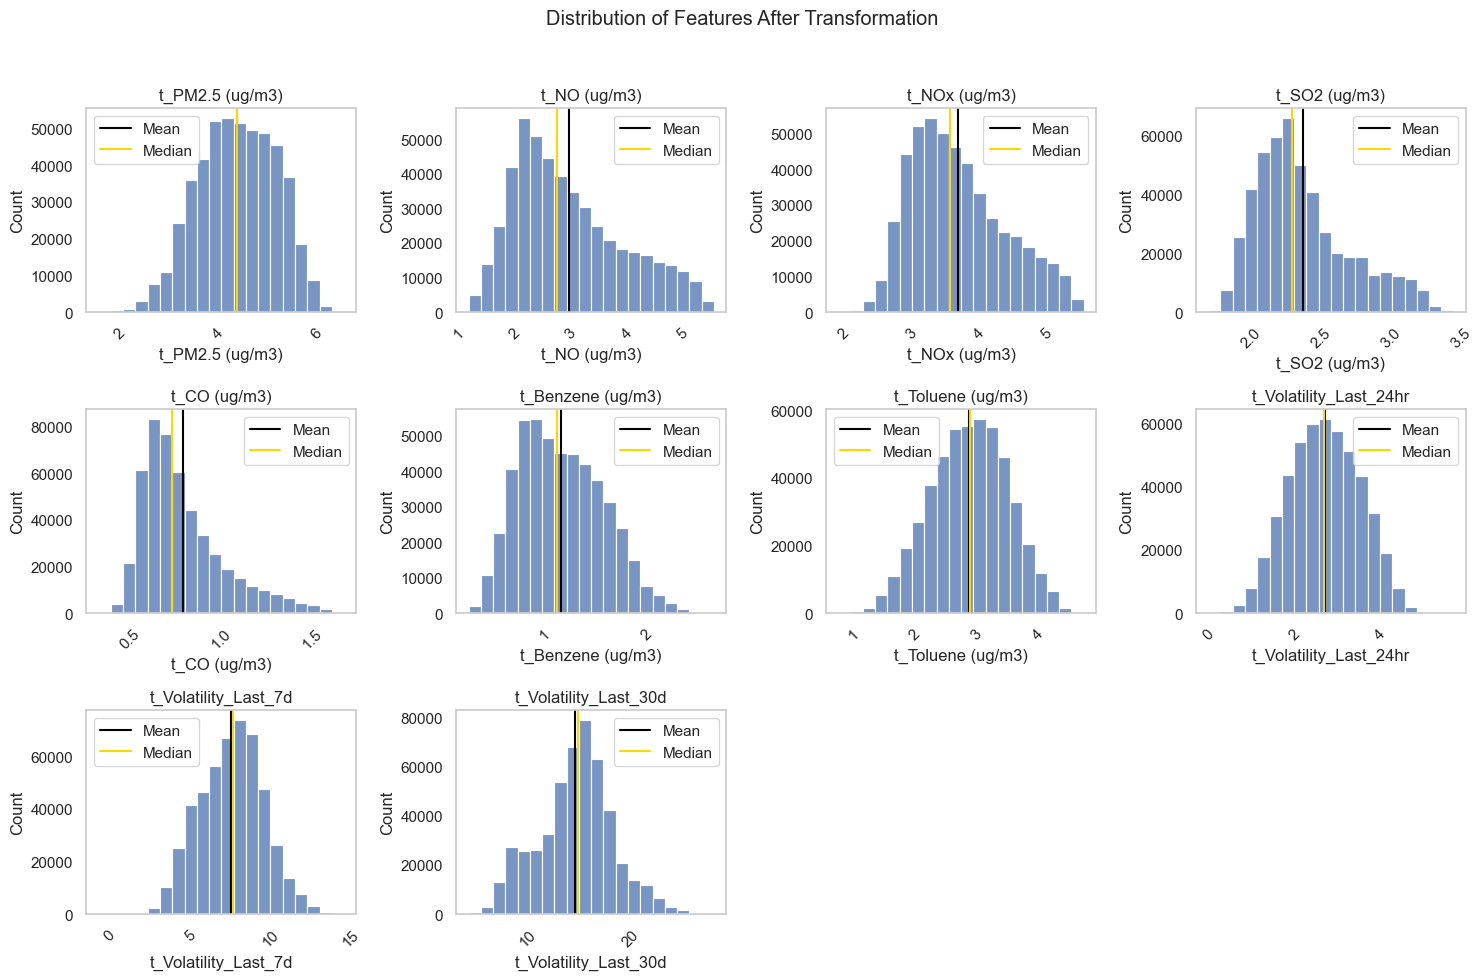

In [ ]:
# Grid of Histograms after Log and Box-Cox Transformation
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
fig.suptitle('Distribution of Features After Transformation', y=1.02)

# List of features for plotting
features_to_plot = ['t_PM2.5 (ug/m3)', 't_NO (ug/m3)', 't_NOx (ug/m3)', 't_SO2 (ug/m3)', 
                    't_CO (ug/m3)', 't_Benzene (ug/m3)', 't_Toluene (ug/m3)', 't_Volatility_Last_24hr',
                    't_Volatility_Last_7d', 't_Volatility_Last_30d']

# Counter for iterating through features
counter = 0

# Plot histograms for each feature
for i in range(4):
    for j in range(4):
        if counter < len(features_to_plot):
            ax = axes[i, j]
            sns.histplot(df[features_to_plot[counter]], bins=20, kde=False, ax=ax)
            ax.set_title(features_to_plot[counter])
            ax.tick_params(axis='x', rotation=45)
            ax.grid(False)

            # Adding mean and median lines
            ax.axvline(df[features_to_plot[counter]].mean(), c='black', label='Mean')
            ax.axvline(df[features_to_plot[counter]].median(), c='gold', label='Median')
            ax.legend()

            counter += 1
        else:
            # Remove empty subplots if the number of features is not a perfect square
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

Finding:

The transformed features demonstrate reduced skewness compared to their original distributions.

In [ ]:
df.head()

Datetime StationId  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0 2021-01-01     DL004     363.873333    327.733876  137.860580    49.843756   
1 2021-01-01     DL007     363.873333    328.043690  137.860580    49.864090   
2 2021-01-01     DL011     365.559583    328.357307  138.026667    49.884244   
3 2021-01-01     DL014     366.236667    328.671352  138.017681    49.904217   
4 2021-01-01     DL016     367.736389    328.989126  141.738261    49.925545   

   NOx (ug/m3)  NH3 (ug/m3)  SO2 (ug/m3)  CO (ug/m3)  ...  t_PM2.5 (ug/m3)  \
0   153.558696    60.277424     9.421631    3.591000  ...         5.899550   
1   153.558696    60.277424     9.425902    3.591000  ...         5.899550   
2   153.490870    60.277424     9.430173    3.601857  ...         5.904161   
3   153.309710    60.332273     9.434156    3.607571  ...         5.906007   
4   150.962941    60.332273     9.438139    3.636143  ...         5.910082   

   t_NO (ug/m3)  t_NOx (ug/m3)  t_SO2 (ug/m3)  t_CO (ug/m3)  \
0      4.933470       5.040574       2.343884      1.524098   
1      4.933470       5.040574       2.344293      1.524098   
2      4.934666       5.040135       2.344703      1.526460   
3      4.934601       5.038962       2.345085      1.527701   
4      4.961013       5.023637       2.345466      1.533883   

   t_Benzene (ug/m3)  t_Toluene (ug/m3)  t_Volatility_Last_24hr  \
0           2.238454           3.865414                2.904512   
1           2.238454           3.865414                2.703665   
2           2.238454           3.865414                1.970355   
3           2.242210           3.865800                3.370648   
4           2.242210           3.865800                2.135296   

   t_Volatility_Last_7d  t_Volatility_Last_30d  
0              7.773454              18.441287  
1              7.806220              14.757339  
2              8.274940              15.456633  
3              8.386697              16.304736  
4              8.583285              18.476640  

[5 rows x 47 columns]

In [ ]:
df.dtypes

Datetime                  datetime64[ns]
StationId                         object
PM2.5 (ug/m3)                    float64
PM10 (ug/m3)                     float64
NO (ug/m3)                       float64
NO2 (ug/m3)                      float64
NOx (ug/m3)                      float64
NH3 (ug/m3)                      float64
SO2 (ug/m3)                      float64
CO (ug/m3)                       float64
Ozone (ug/m3)                    float64
Benzene (ug/m3)                  float64
Toluene (ug/m3)                  float64
RH (%)                           float64
WS (m/s)                         float64
WD (degree)                      float64
BP (mmHg)                        float64
AT (degree C)                    float64
RF (mm)                          float64
SR (W/mt2)                       float64
AQI                              float64
Year                               int32
Month                              int32
DayOfWeek                          int32
HourOfDay       

In [ ]:
# look at the size of our data
df.shape

(491616, 47)

In [ ]:
# removing the columns that we don't need like 'Datetime', 'StationId', 'y_AQI'(target variable), 'AQI_Category' and the non-log-transformed features 
X_columns = df.drop(['Datetime', 'StationId', 'y_AQI', 'AQI_Category', 'PM2.5 (ug/m3)', 'NO (ug/m3)', 'NOx (ug/m3)', 'SO2 (ug/m3)', 
                    'CO (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Volatility_Last_24hr',
                    'Volatility_Last_7d', 'Volatility_Last_30d'], axis=1).columns.tolist()
X = df[X_columns]
y = df['y_AQI']

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# # Plotting the train-test split
# plt.figure(figsize=(15, 5))
# plt.plot(X_train, y_train, color='purple', label='Training')
# plt.plot(X_test, y_test, color='orange', label='Testing')
# plt.xlabel('Feature')  # Replace with a descriptive term for your x-axis
# plt.ylabel('y_AQI')
# plt.title('Train-Test Split of X and y_AQI (Line Plot)')
# plt.legend()
# plt.show()


In [ ]:
# # Plotting the train-test split
# plt.figure(figsize=(15, 5))
# plt.plot(X_train, y_train, color='purple', label='Training')
# plt.plot(X_test, y_test, color='orange', label='Testing')
# plt.xlabel('Feature')  # Replace with a descriptive term for your x-axis
# plt.ylabel('y_AQI')
# plt.title('Train-Test Split of X and y_AQI (Line Plot)')
# plt.legend(loc="upper left")  # Specify the legend location
# plt.show()

In [ ]:
# Initialize the scaler and fit on the training data
scaler = StandardScaler()

# Transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train) # X_train # scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # X_test # scaler.transform(X_test)

In [ ]:
# Initialize and train the linear regression model
linreg_model = LinearRegression()
linreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linreg_model.predict(X_test_scaled)

# 1. Evaluate the Model Performance

In [ ]:
# Mean Squared Error (MSE): Evaluate how well the model predicts by calculating the MSE.
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3234.838513744324


In [ ]:
# R-squared (R2): Measures the proportion of the variance in the dependent variable explained by the independent variables
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.7892609848934931


**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Features without PCA                           | R<sup>2<sup/>    |
|-------|----------------------------------------|-------|
| 1 | All                                        | 0.79 |

### Model Diagnostics 

We need to check the assumptions associated with a linear regression model:

* **Residuals** are normally distributed.
* **Homoscedasticity**: The variance of residual is the same for any value of X.


### Significance of Residuals' Normality in Regression Analysis
Ensuring the normality of residuals in regression models is crucial for accurate statistical tests, precise parameter estimates, fulfilling model assumptions, optimizing predictions, identifying patterns for model improvement, and maintaining the reliability of inferences. While non-normality doesn't necessarily invalidate a model, it prompts caution, diagnostics, and consideration of alternatives, especially for large datasets.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


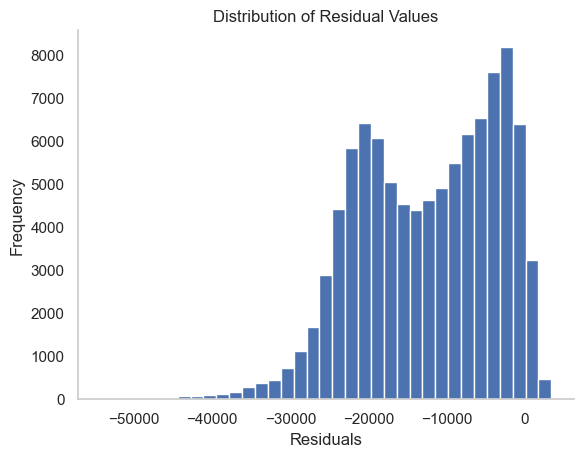

In [ ]:
# Calculate residuals
residuals = y_test - linreg_model.predict(X_test)

# Plotting the residuals
plt.figure()
plt.hist(residuals, bins=35)
plt.title('Distribution of Residual Values')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

### Choosing Anderson-Darling Test for Residual Normality in Large Datasets

In the context of assessing normality of residuals in a linear regression model, traditional tests like the Shapiro-Wilk test might produce inaccurate p-values and suggest departure from normality, especially with large datasets.

The Anderson-Darling test statistic is a measure of how well the sample data fit a particular distribution, in this case, a normal distribution. The critical values provided in the output are thresholds against which the test statistic is compared. If the test statistic exceeds the critical value, it suggests evidence against the null hypothesis that the data follow a normal distribution.

#### Alternative Approach:
Instead of relying solely on the Shapiro-Wilk test, which warns of potential accuracy issues for large sample sizes, the Anderson-Darling test is considered. The Anderson-Darling test is known to be less affected by large sample sizes and provides an alternative statistical evaluation.

In [ ]:
result = anderson(residuals)
print("Anderson-Darling Test Statistic:", result.statistic)
print("Critical Values:", result.critical_values)

Anderson-Darling Test Statistic: 1215.1393494161166
Critical Values: [0.576 0.656 0.787 0.918 1.092]


##### Result:
The Anderson-Darling test statistic is significantly larger than the critical values, indicating a substantial deviation from a normal distribution. The larger the test statistic, the stronger the evidence against normality.

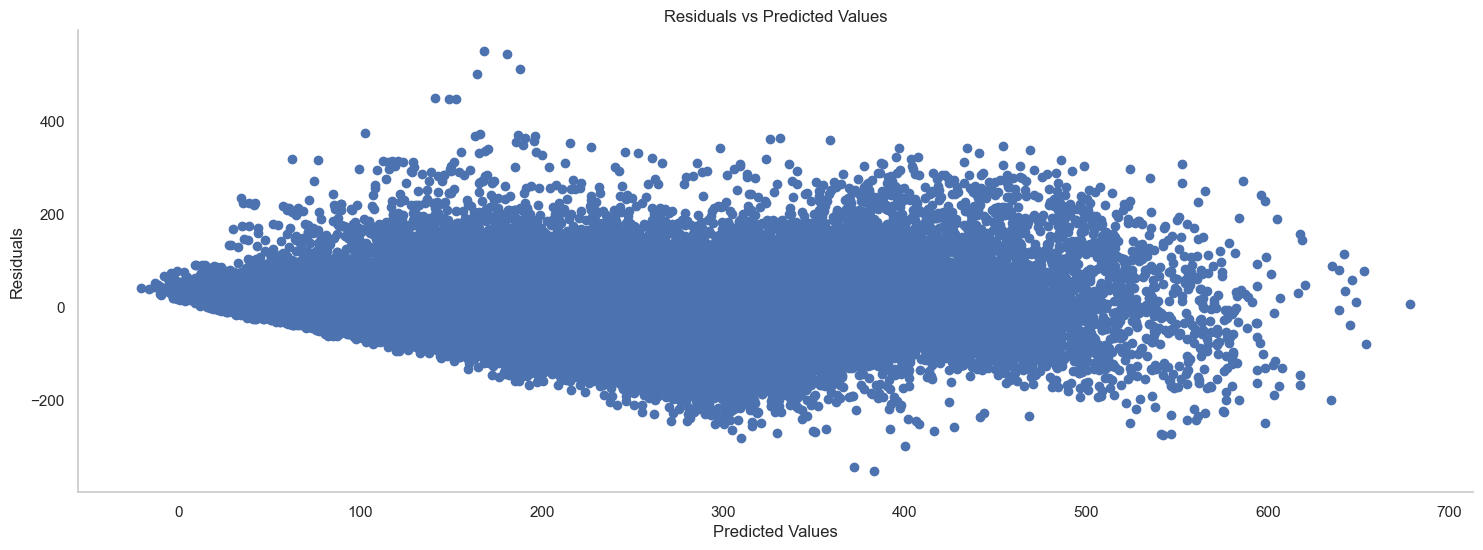

In [ ]:
# Plot residuals (the differences between observed and predicted values) against predicted values to check for patterns or heteroscedasticity
residuals = y_test - y_pred
plt.figure(figsize=(18, 6))
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

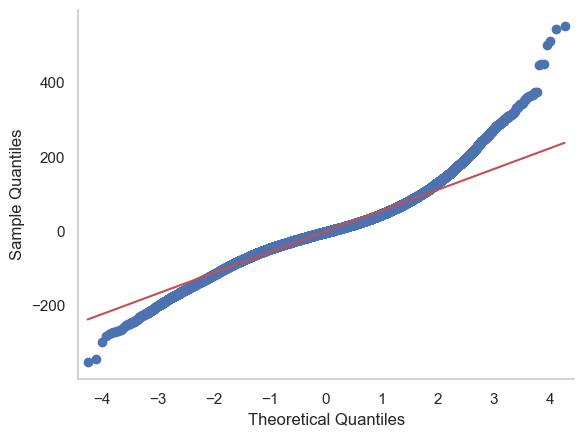

In [ ]:
# Check if residuals are normally distributed using a Q-Q plot.
import statsmodels.api as sm
sm.qqplot(residuals, line='r')

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

#### Homoscedasticity

We perform this step to assess whether the variance of the residuals (the differences between observed and predicted values) is consistent across all levels of the independent variable(s).

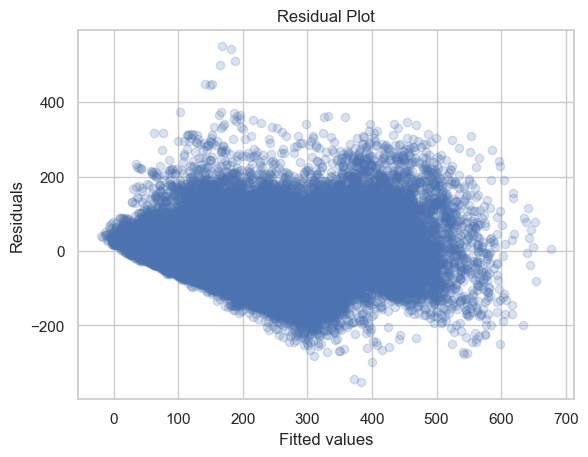

In [ ]:
# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals, alpha=0.2)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# Check the coefficients of the features to understand their impact.
coefficients = linreg_model.coef_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance_sorted = feature_importance.sort_values(by='Coefficient').reset_index(drop=True)

print(feature_importance_sorted)

                   Feature  Coefficient
0             PM10 (ug/m3)   -10.994095
1                   RH (%)    -9.153156
2            AT (degree C)    -8.697706
3                 WS (m/s)    -8.517875
4            t_NOx (ug/m3)    -6.534636
5        t_Toluene (ug/m3)    -5.094369
6              NH3 (ug/m3)    -4.319576
7                     Year    -3.956934
8            AQI_lag_168hr    -3.177988
9            t_SO2 (ug/m3)    -3.118965
10    t_Volatility_Last_7d    -2.986878
11               DayOfWeek    -1.433576
12  t_Volatility_Last_24hr    -0.907713
13               HourOfDay    -0.625507
14                 RF (mm)    -0.527673
15              SR (W/mt2)     0.523933
16               longitude     0.699888
17            AQI_lag_24hr     1.442782
18                   Month     1.704171
19               BP (mmHg)     2.267230
20       t_Benzene (ug/m3)     2.762614
21                latitude     3.465098
22             NO2 (ug/m3)     3.585067
23            AQI_lag_48hr     3.708567


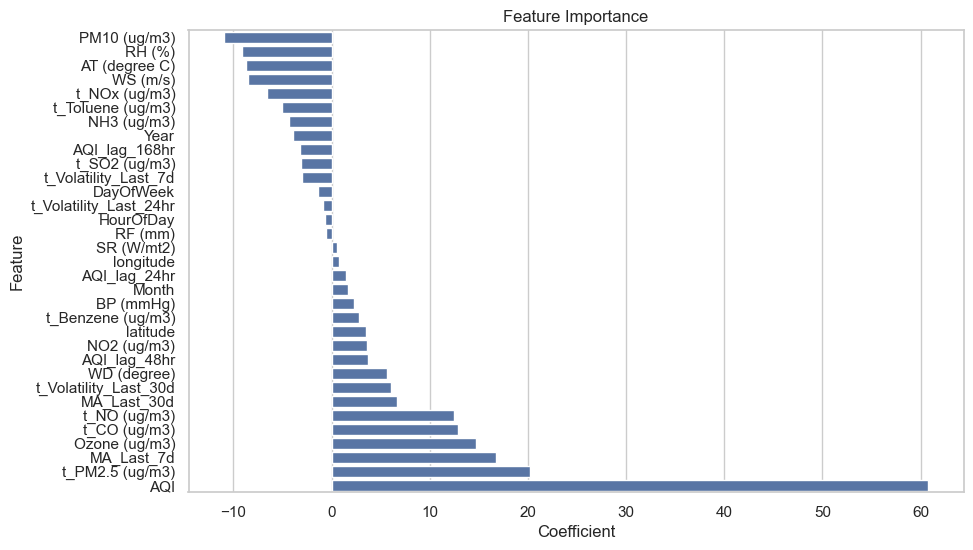

In [ ]:
# Visualize the coefficients.
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.sort_values(by='Coefficient'))
plt.title('Feature Importance')
plt.show()

## Fitting a Decision Tree Model

In this section, we explore the process of fitting a Decision Tree model to predict the target variable (`y_AQI`) based on selected features.

In [ ]:
# Initialize the Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

### Prediction:
   - Predictions are made on the test set using the trained model.

In [ ]:
# Step 4: Make predictions on the training set
y_train_pred = decision_tree_model.predict(X_train)

# Make predictions on the test set
y_test_pred = decision_tree_model.predict(X_test)

In [ ]:
# Step 4: Make predictions on the training set
y_train_pred = decision_tree_model.predict(X_train)

# Step 5: Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Step 6: Make predictions on the testing set
y_test_pred = decision_tree_model.predict(X_test)

# Step 7: Evaluate the model on the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Step 8: Print the evaluation metrics
print(f"Training MSE: {mse_train:.2f}, R^2: {r2_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}, R^2: {r2_test:.2f}")

Training MSE: 4411.32, R^2: 0.71
Testing MSE: 4408.77, R^2: 0.71


### Model Evaluation:
   - The performance of the model is evaluated using mean squared error (MSE) and R-squared metrics.

In [ ]:
# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Print the evaluation metrics
print(f"Training MSE: {mse_train:.2f}, R^2: {r2_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}, R^2: {r2_test:.2f}")

Training MSE: 4411.32, R^2: 0.71
Testing MSE: 4408.77, R^2: 0.71


### Visualization of Decision Tree Structure
   - The structure of the Decision Tree can be visualized using graphviz. This step is optional and requires the installation of the `graphviz` library.

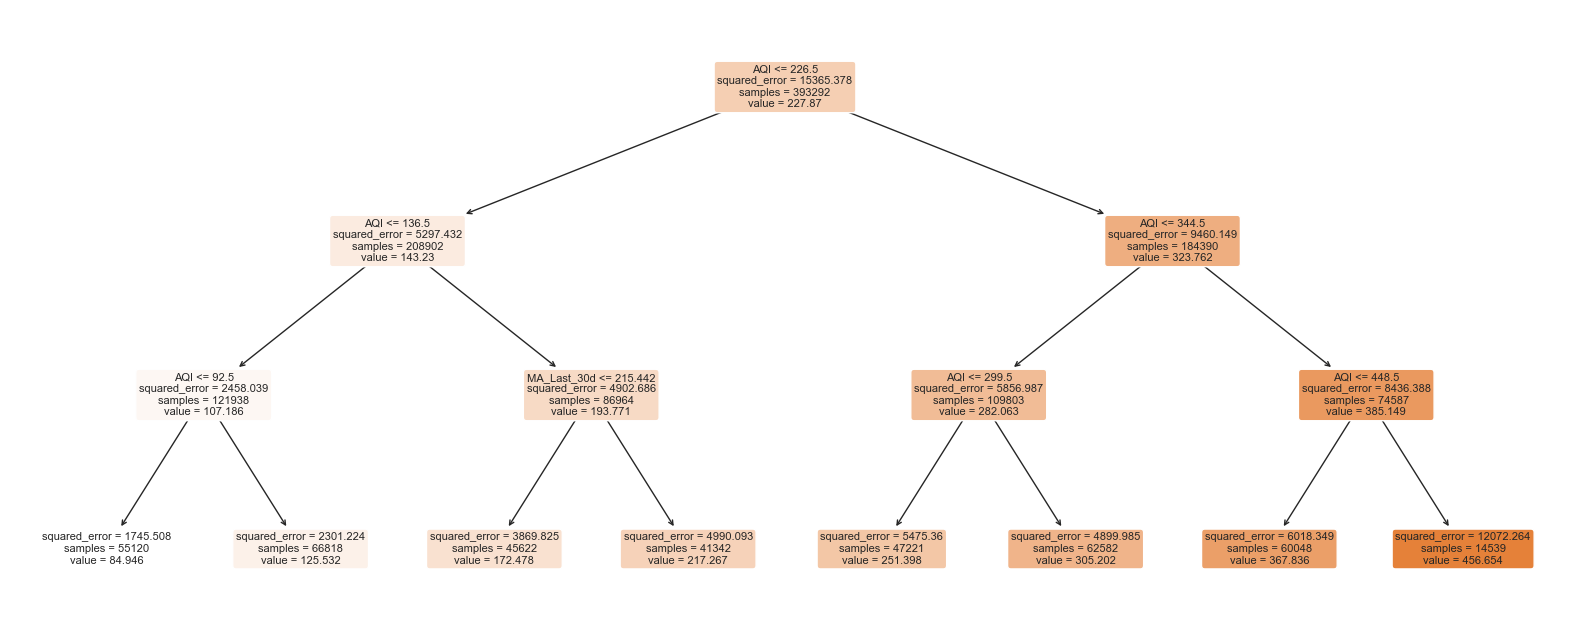

In [ ]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20,8))

plot_tree(decision_tree_model,
          feature_names=X_train.columns,
          rounded=True,
          impurity=True,
          filled=True,
          ax=ax,
          fontsize=8)

plt.show()